<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первый-взгляд-на-данные" data-toc-modified-id="Первый-взгляд-на-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первый взгляд на данные</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Кластеризация" data-toc-modified-id="Кластеризация-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Прогнозирование вероятности оттока клиентов фитнес-центра.

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Цели проекта:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.

Изучаемые данные:
- Сsv файл с данными о клиентах фитнес-центра на месяц до оттока и факт оттока на определённый месяц.

##  Первый взгляд на данные 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
import matplotlib.dates as md
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
%config InlineBackend.figure_format='retina'
from matplotlib import cycler
import operator
colors = cycler('color',
                ['#345995', '#FB4D3D', '#8C2D7E',
                 '#E40066', '#03CEA4', '#EAC435',
                 '#806045', '#04724D', '#00A8E8',
                 '#88BB44', '#FFFFFF', '#FFBBBB','#00FF00','#000000'])
plt.rc('axes',facecolor='#E6E6E6',  edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 0.999)})
pd.set_option('chained_assignment', None)
import datetime 
import math as mth
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
try:
    df = pd.read_csv('/datasets/gym_churn.csv')
except:
    df = pd.read_csv('gym_churn.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Поля в датасете:

Целевая переменная:
- 'Churn' — факт оттока в текущем месяце.

Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Проверим данные на дупликаты:

In [5]:
print('Дупликаты строк:',df.duplicated().sum())

Дупликаты строк: 0


Приведем названия столбцов к нижнему регистру и заменим некоторые на более короткие:
- promo_friends -> promo
- avg_additional_charges_total -> avg_charges_total
- avg_class_frequency_total -> avg_freq_total
- avg_class_frequency_current_month -> avg_freq_month
- contract_period -> contract
- near_location -> near_loc



In [6]:
df.columns = df.columns.str.lower()
df = df.rename(columns={
    'promo_friends':'promo',
    'avg_additional_charges_total':'avg_charges_total',
    'month_to_end_contract':'month_to_end',
    'avg_class_frequency_total':'avg_freq_total',
    'avg_class_frequency_current_month':'avg_freq_month',
    'contract_period':'contract',
    'near_location':'near_loc'
    })

С данными все в порядке, можно приступать к анализу.

## Исследовательский анализ данных 

Изучим средние значения и стандартные отклонения в датасете

In [7]:
df.describe().round(2)

,gender,near_loc,partner,promo,phone,contract,group_visits,age,avg_charges_total,month_to_end,lifetime,avg_freq_total,avg_freq_month,churn
count,4000.00,4000.00,4000.00,4000.00,4000.0,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.9,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.3,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.0,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.0,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.0,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.0,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.0,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Средние показатели по датасету:

- Показатели оттока: 27%
  
- Одинаковое количесвто представителей обеих полов
- 85% клиентов живут рядом с фитнес-центром
- Половина клиентов являются сотрудниками компании-партнёра клуба, и 30% пришли по акции "приведи друга"
- 90% клиентов оставили свой телефон
- Средняя длительность текущего действующего абонемента 4.6 месяца
- 40% посещают групповые занятия
- Средний возраст 29 лет
- Средние траты на дополнительные услуги и товары - 146 у.е.
- Средний срок до окончания текущего действующего абонемента 4.3 месяца
- Среднее время с момента первого обращения в фитнес-центр 3.7 месяца
- Средняя частота посещений в неделю в общем - 1.9, на текущий месяц - 1.8

Аномальных занчений показателей обнаружено не было.

Построим графики распределения и выведем средние значения признаков в двух группах — тех, кто ушел в отток, и тех, кто остался.

In [8]:
df.groupby('churn').mean()

,gender,near_loc,partner,promo,phone,contract,group_visits,age,avg_charges_total,month_to_end,lifetime,avg_freq_total,avg_freq_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


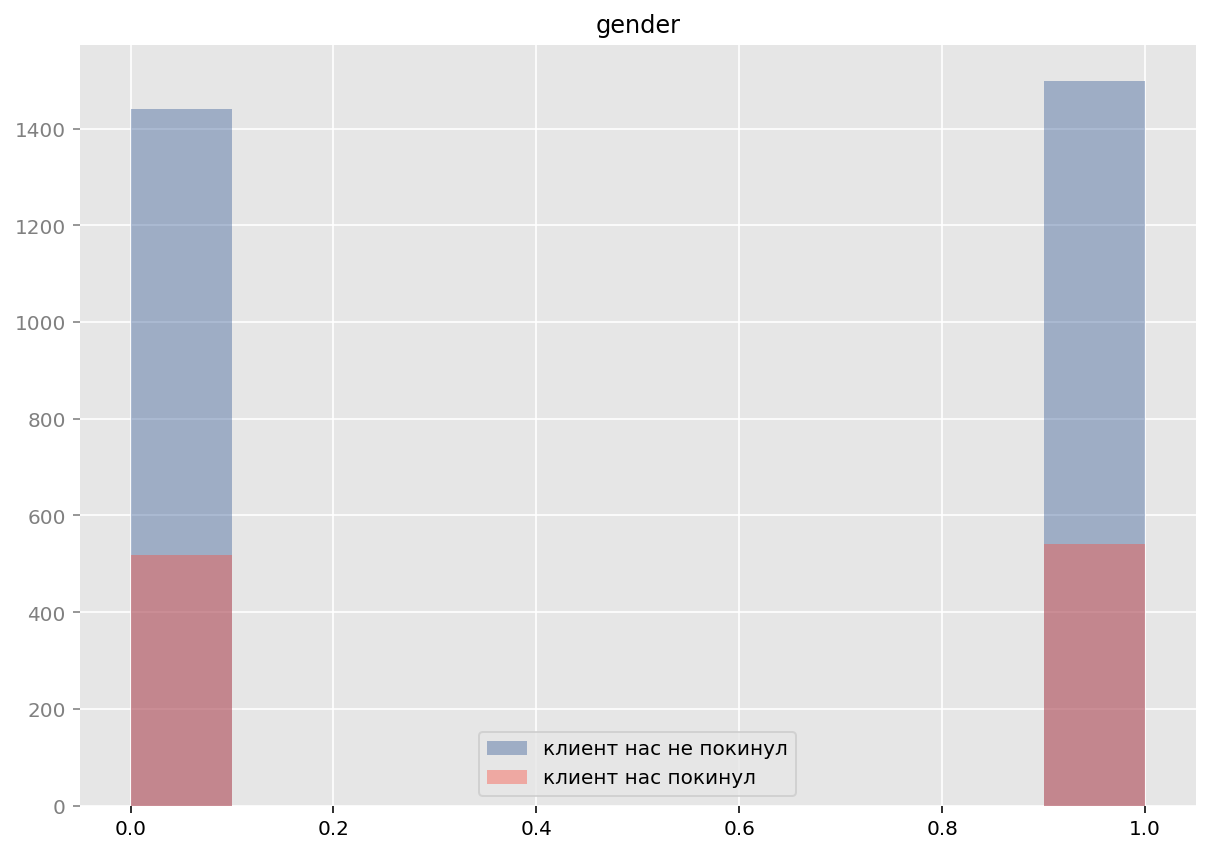

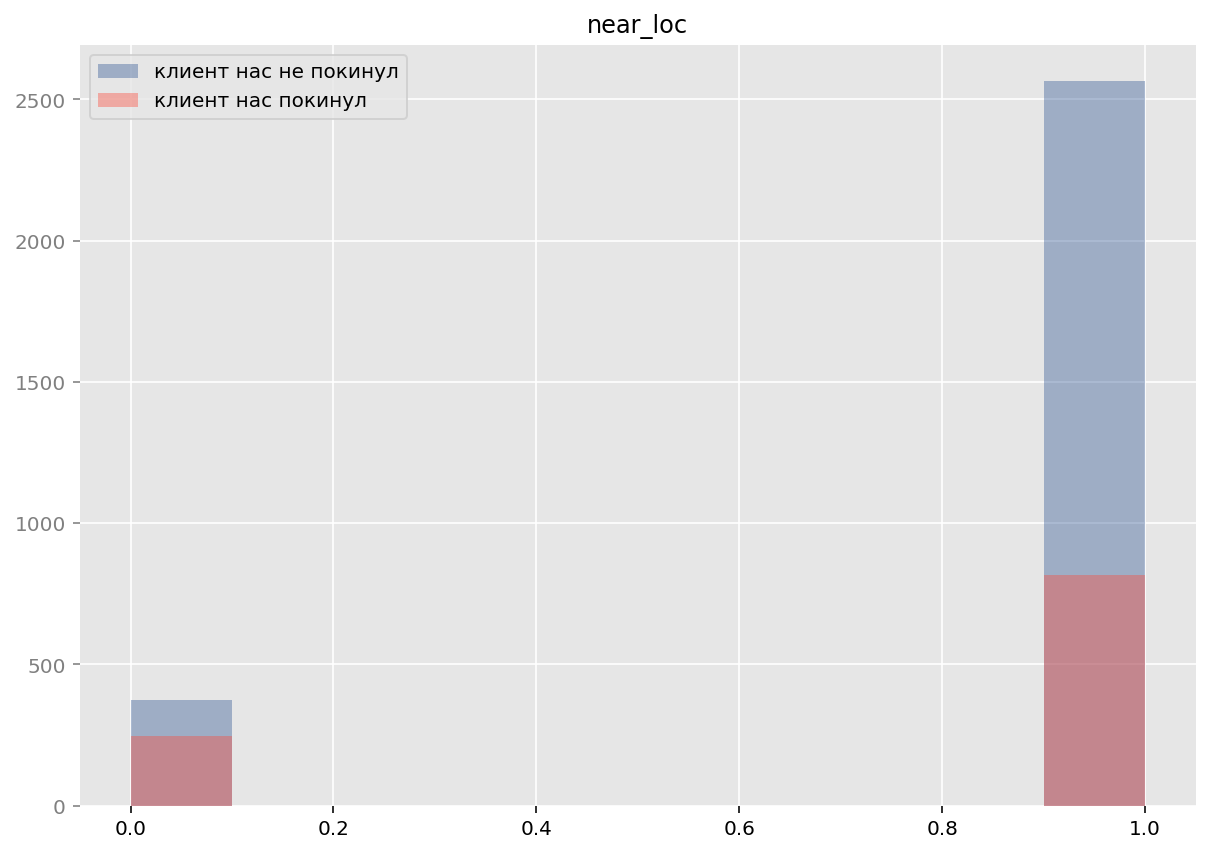

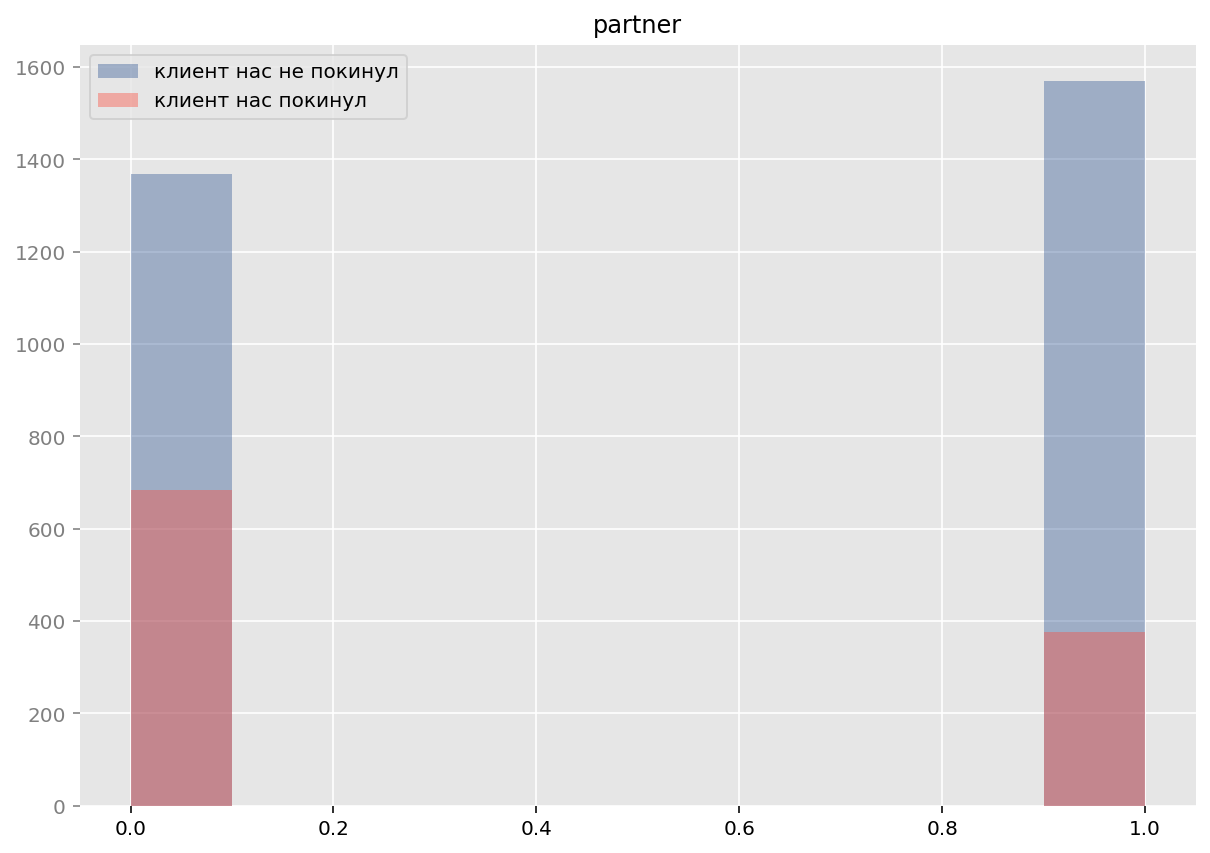

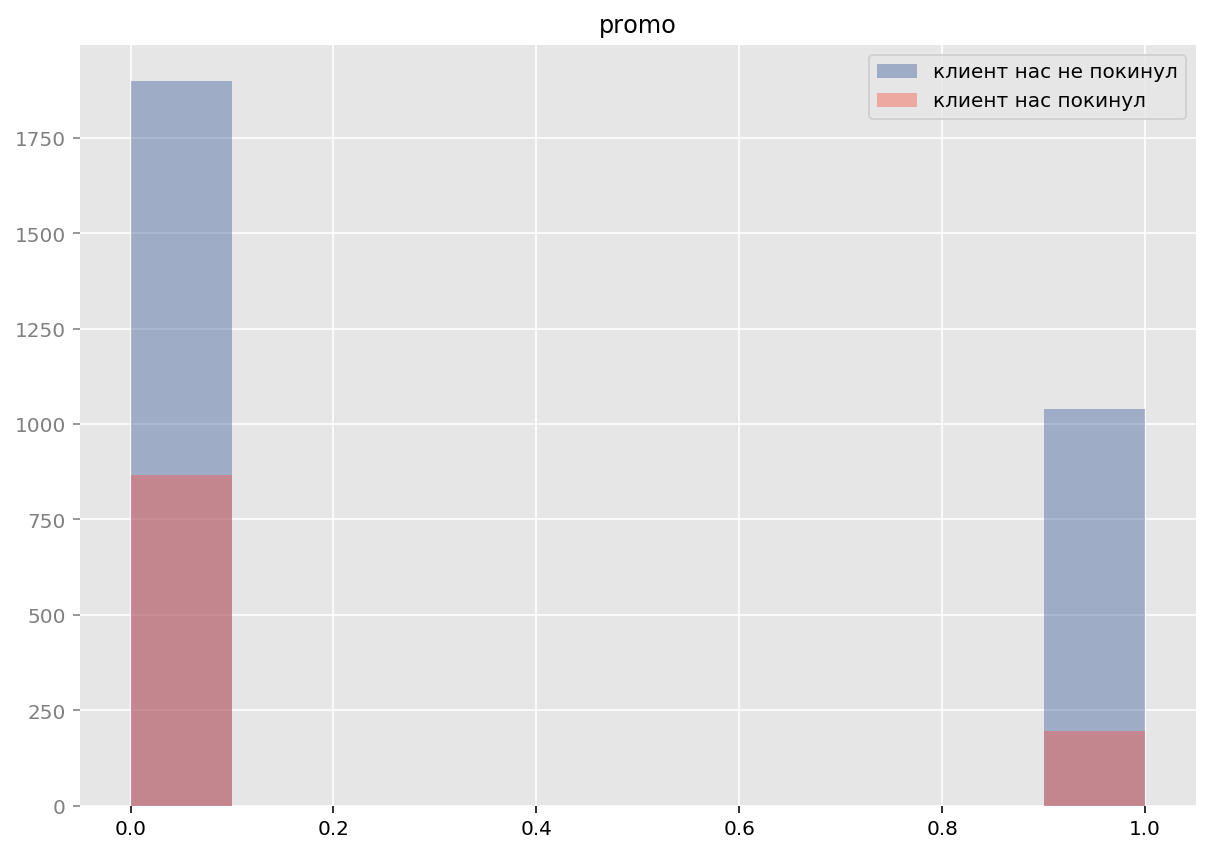

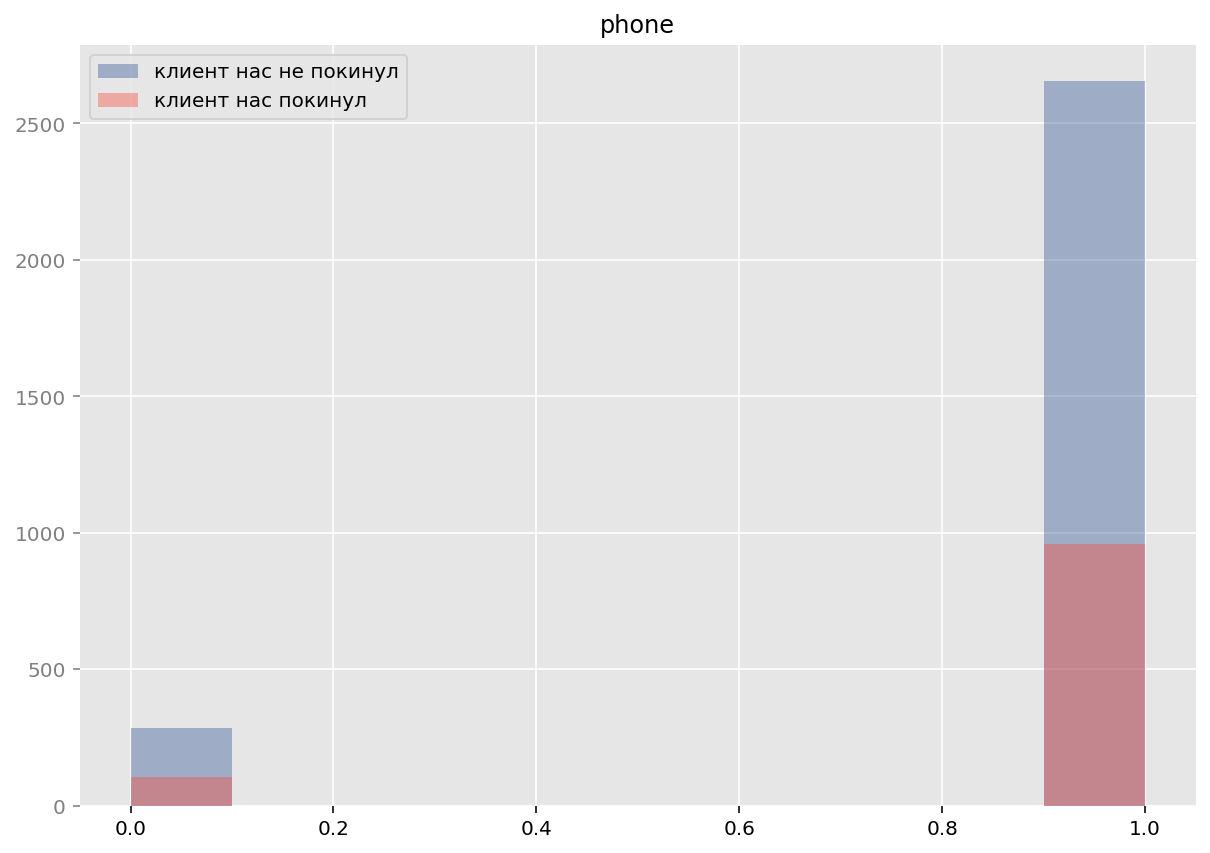

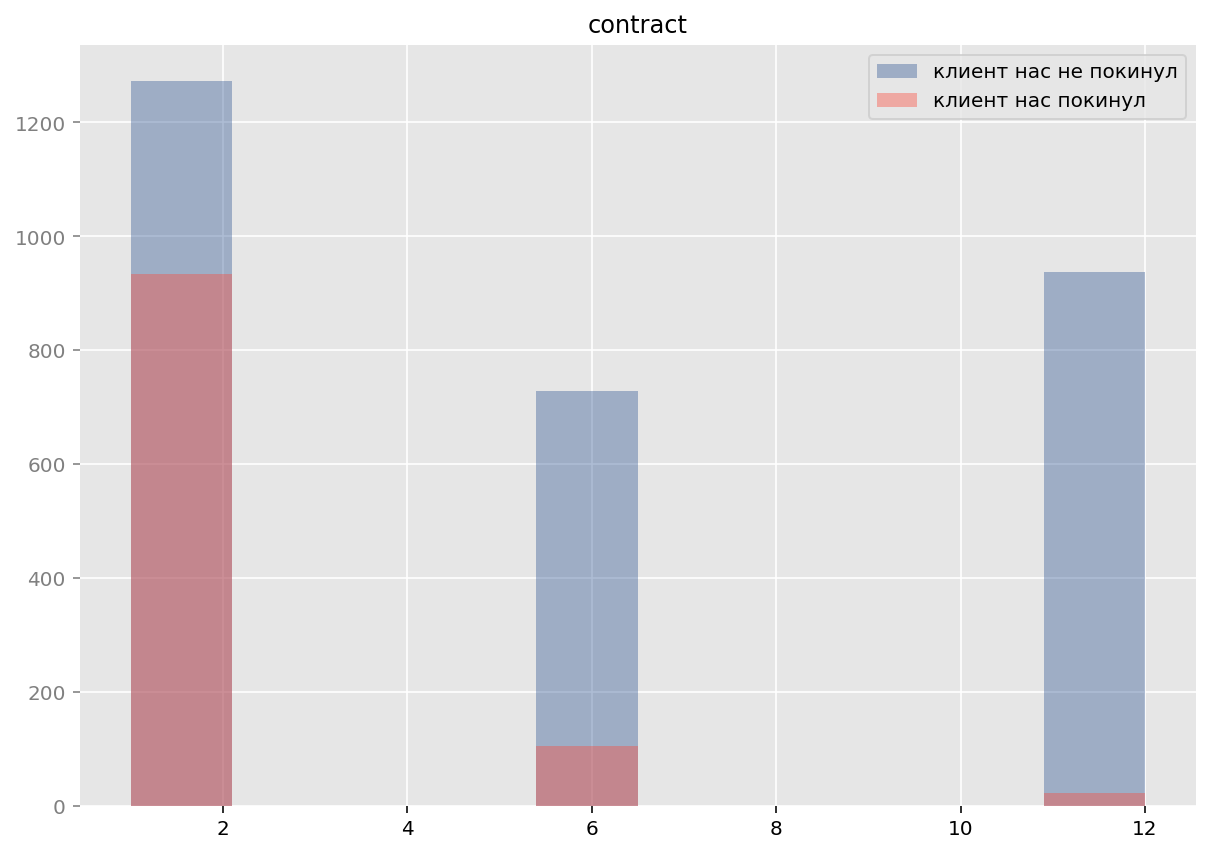

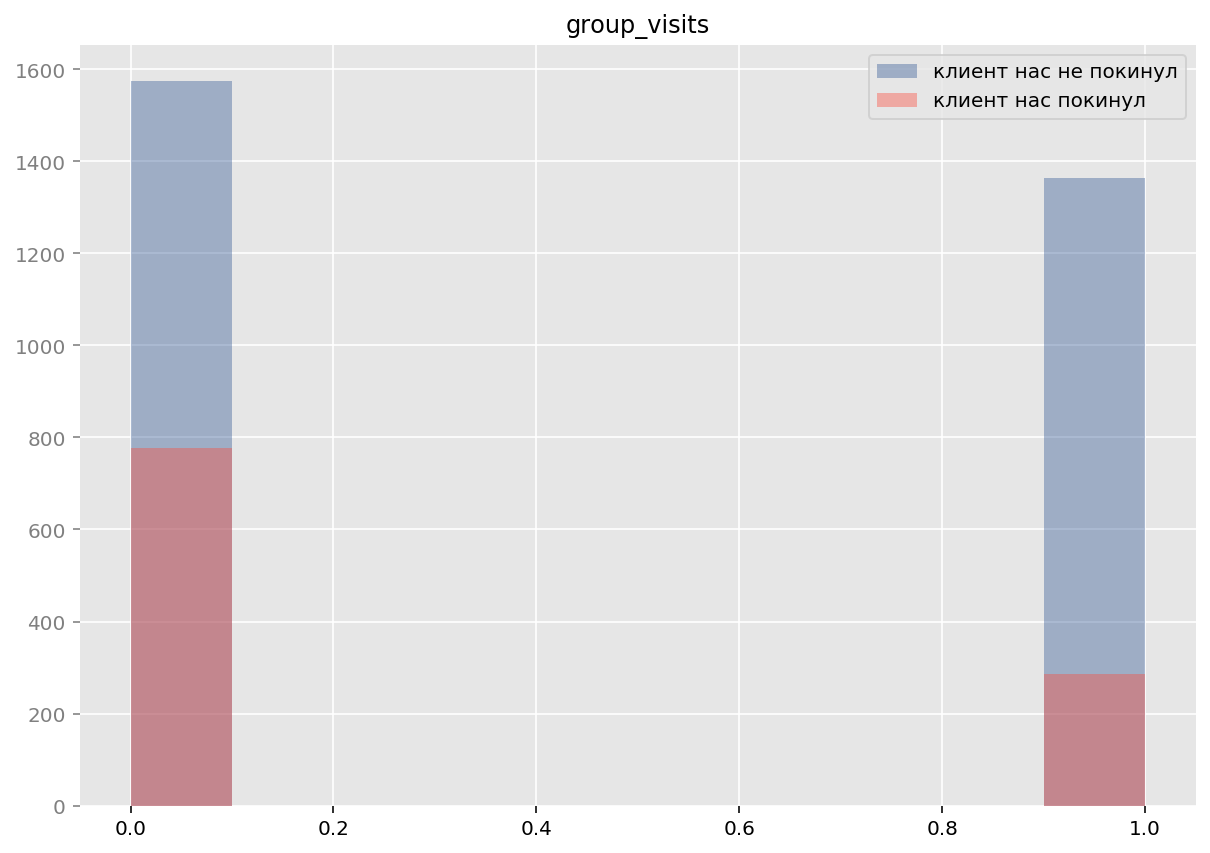

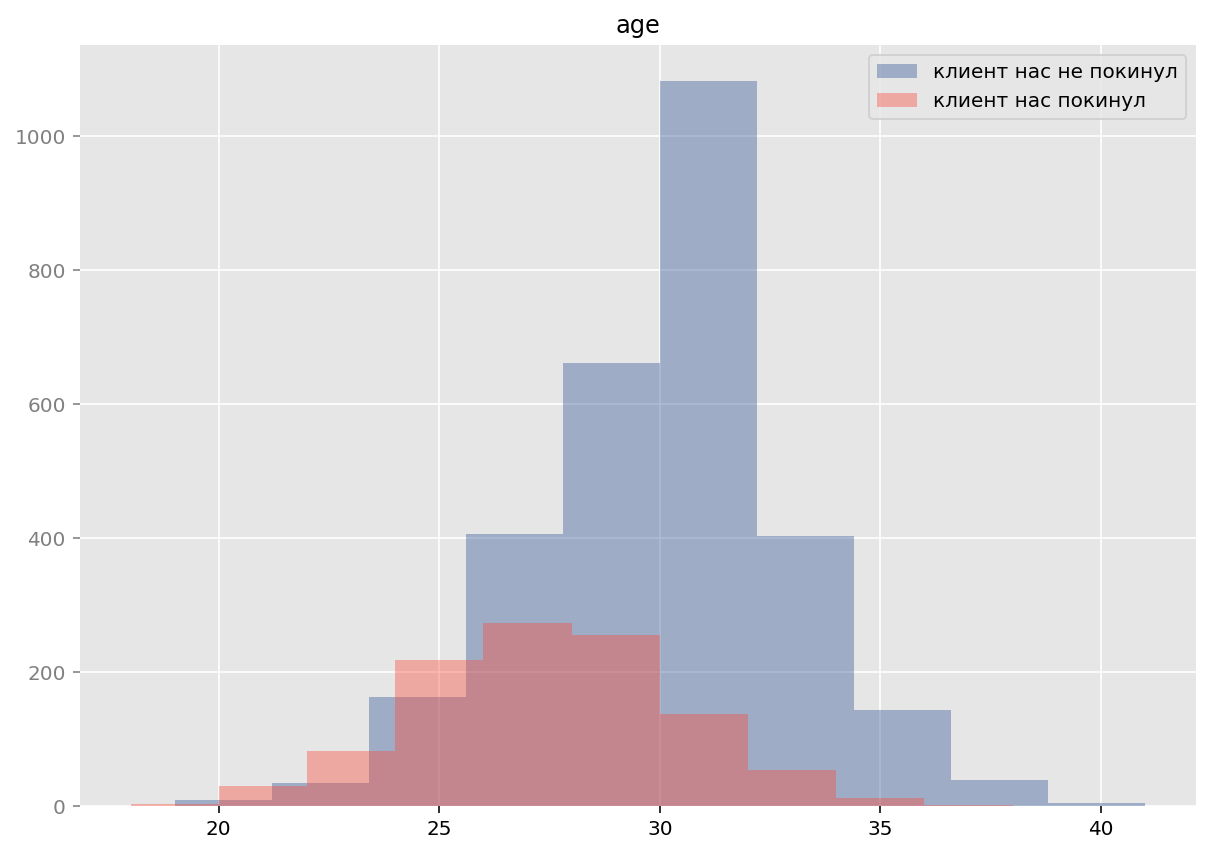

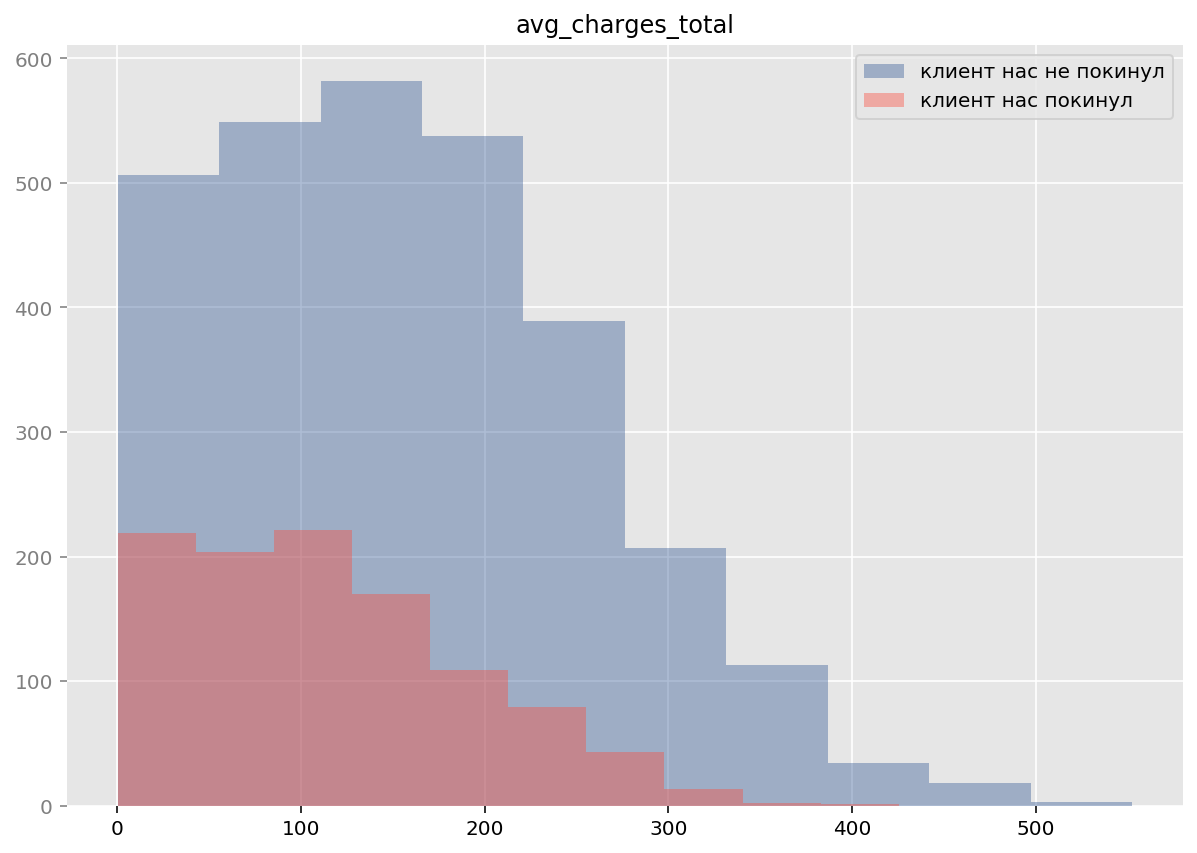

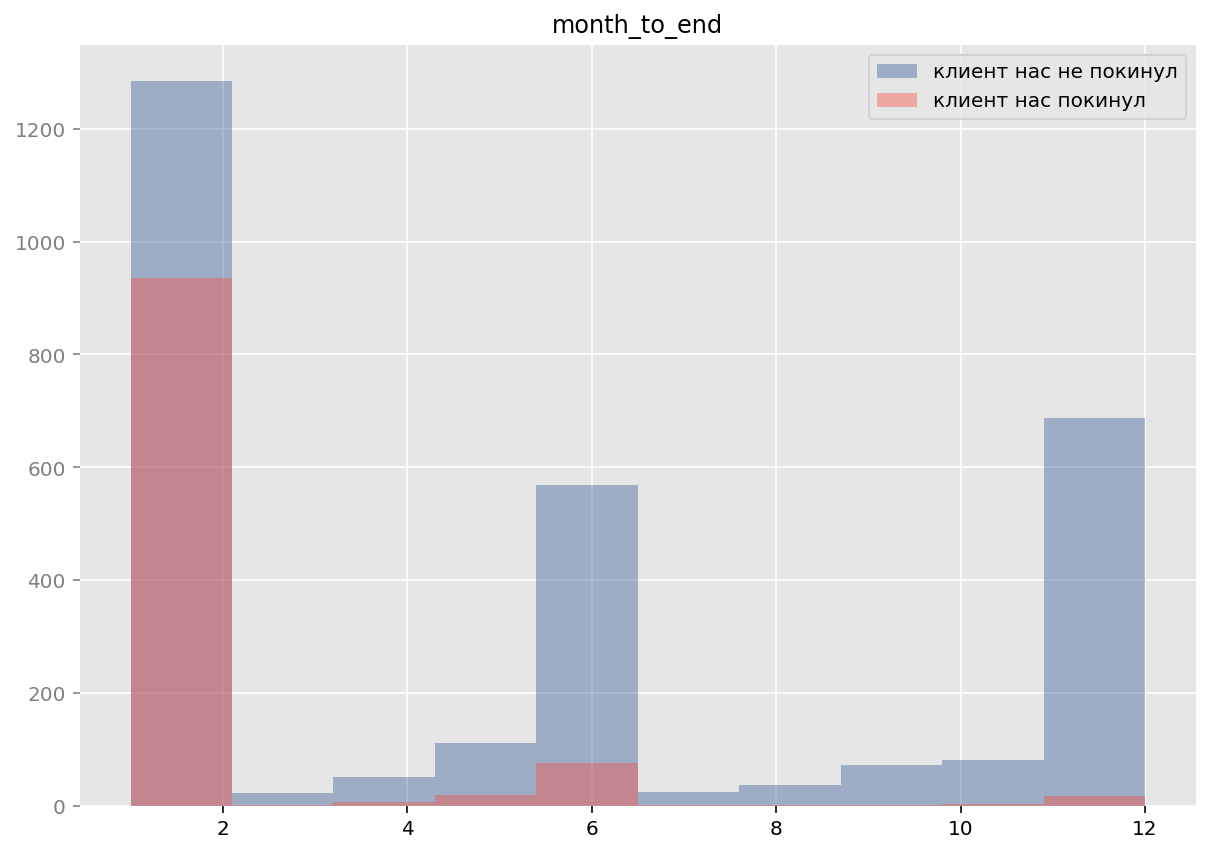

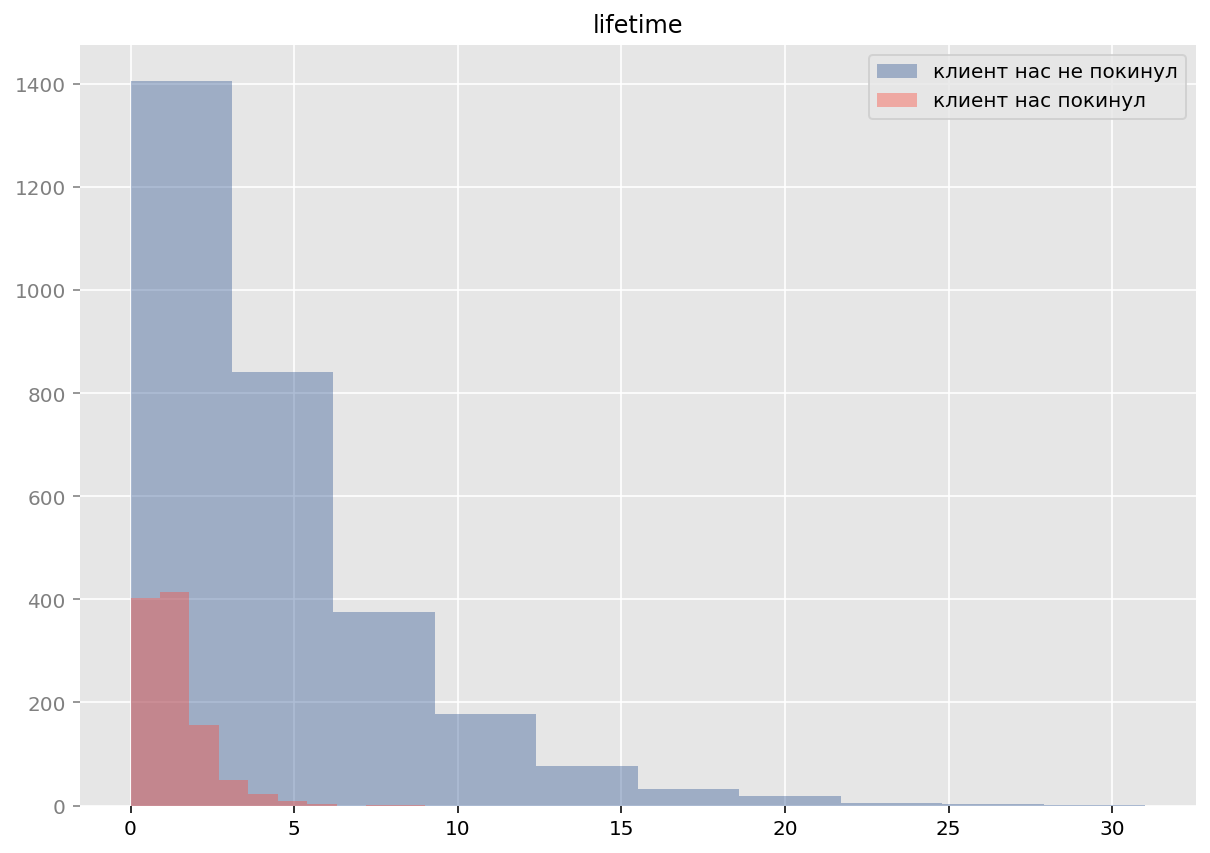

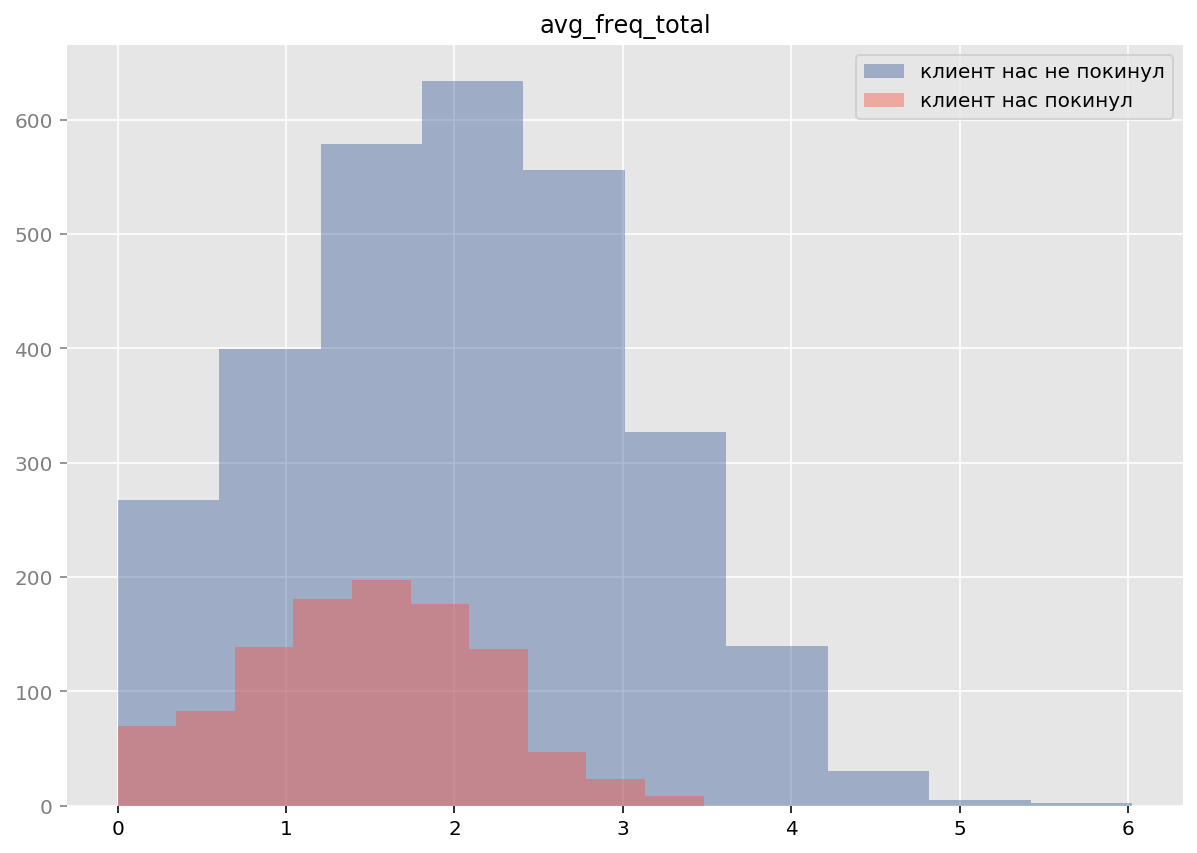

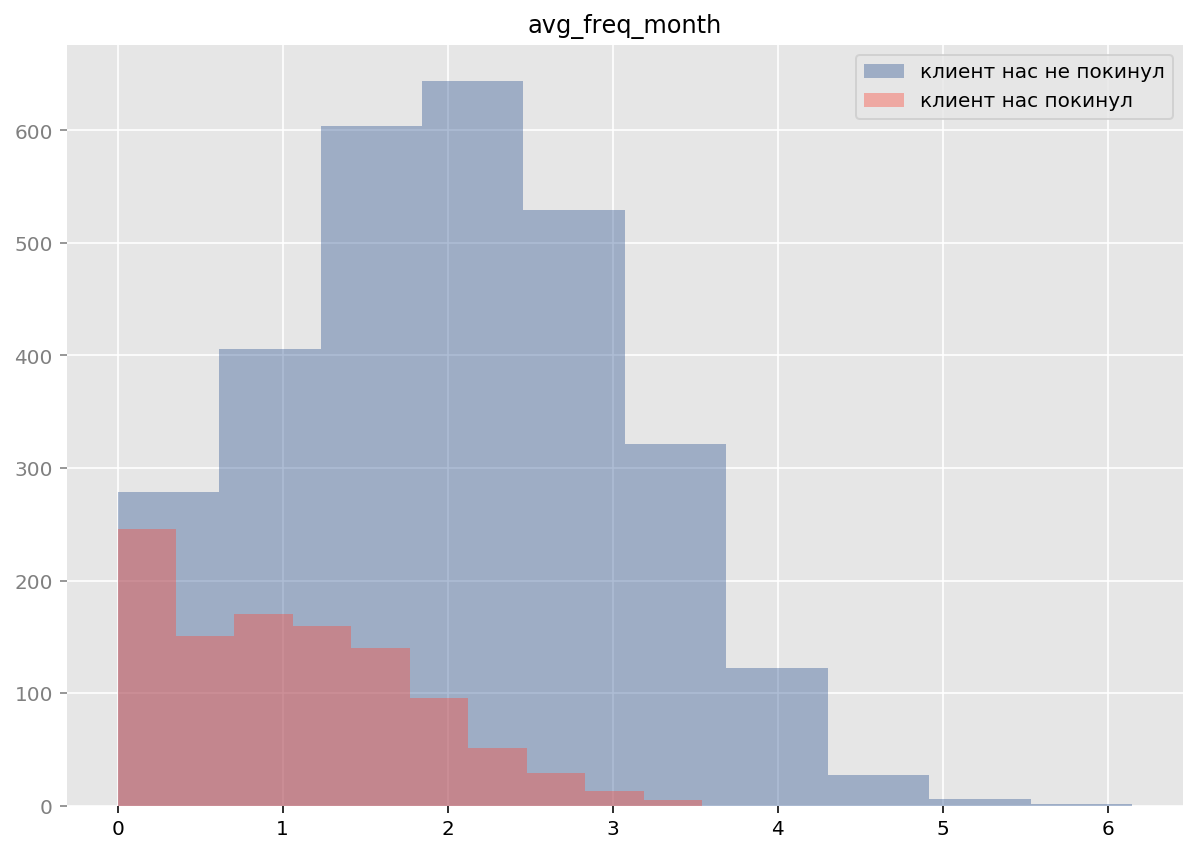

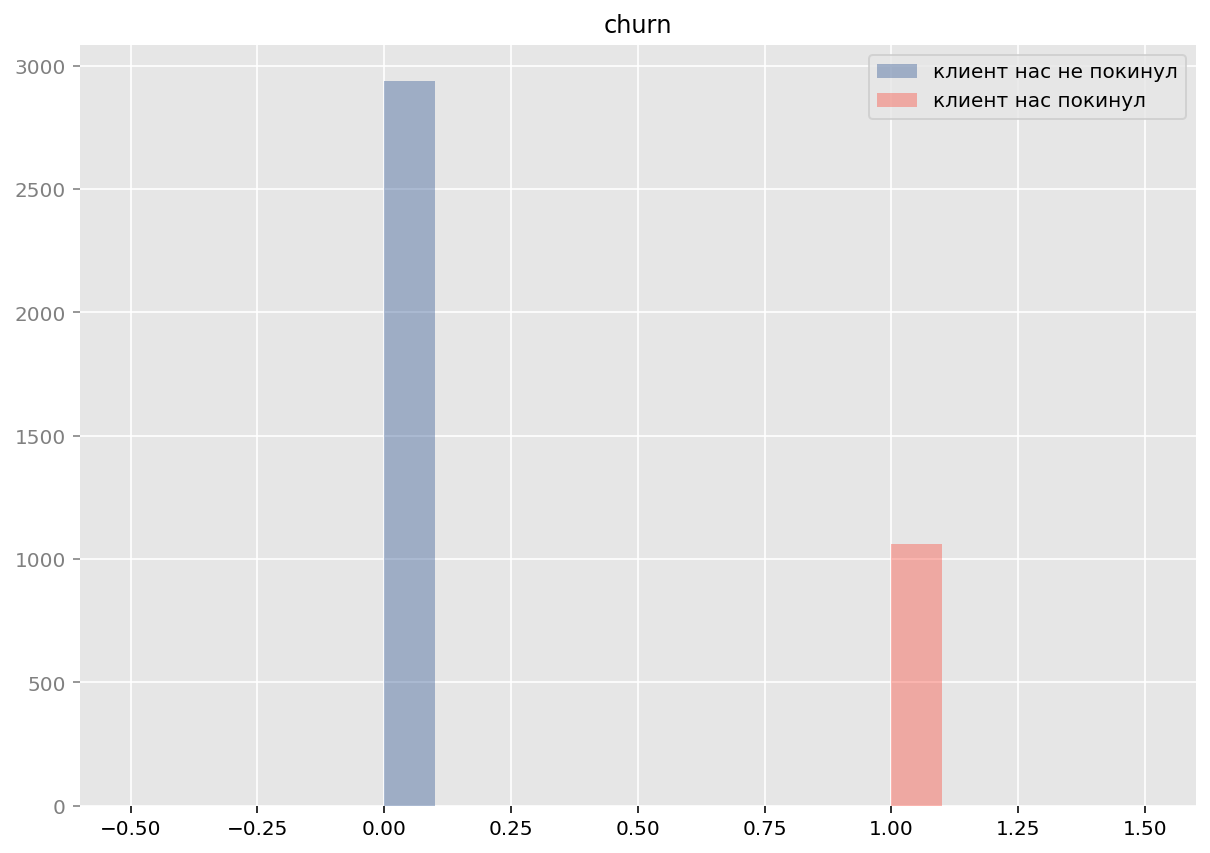

In [9]:
for feature in df.columns:
    plt.title(feature)
    sns.distplot(df.query('churn == 0')[feature], bins = 10, kde = False, label = 'клиент нас не покинул')
    sns.distplot(df.query('churn == 1')[feature], bins = 10, kde = False, label = 'клиент нас покинул')
    plt.xlabel('')
    plt.legend()
    plt.show()                    

Распредение признаков для попавших и не попавших в отток:
    
- Распределение по полу одинаковое
- Живущие рядом немногим реже попадают в отток
- Сотрудниками компании-партнёра клуба реже попадают в отток - среди тех кто остался таких 53%, среди ушедших - 35% 
- Пришедшие по программе "Приведи друга реже попадают в отток - среди тех кто остался таких 53%, среди ушедших - 35%
- Наличие контактного телефона у двух групп не различается.
- У текущих клиентов длительность текущего абонемента составляет 5.7 месяца, в оттоке - 1 месяц
- У текущих клиентов показатели посещения групповых занятий выше - 46% против 26%
- Средний возраст у текущих клиентов 30 лет, у оттока - 27.
- У оттока дополнительные траты на треть меньше, чем у оставшихся клиентов.
- Среднее количество месяцев до конца абонемента у оставшихся клиентов 5.3, у оттока 1.6
- Среднее время с момента первого обращения среди тех, кто остался, намного выше - 5 месяцев против 1
- Средняя частота посещений в неделю среди тех, кто остался, больше примерно в 2 раза.

Построим матрицу корреляции.

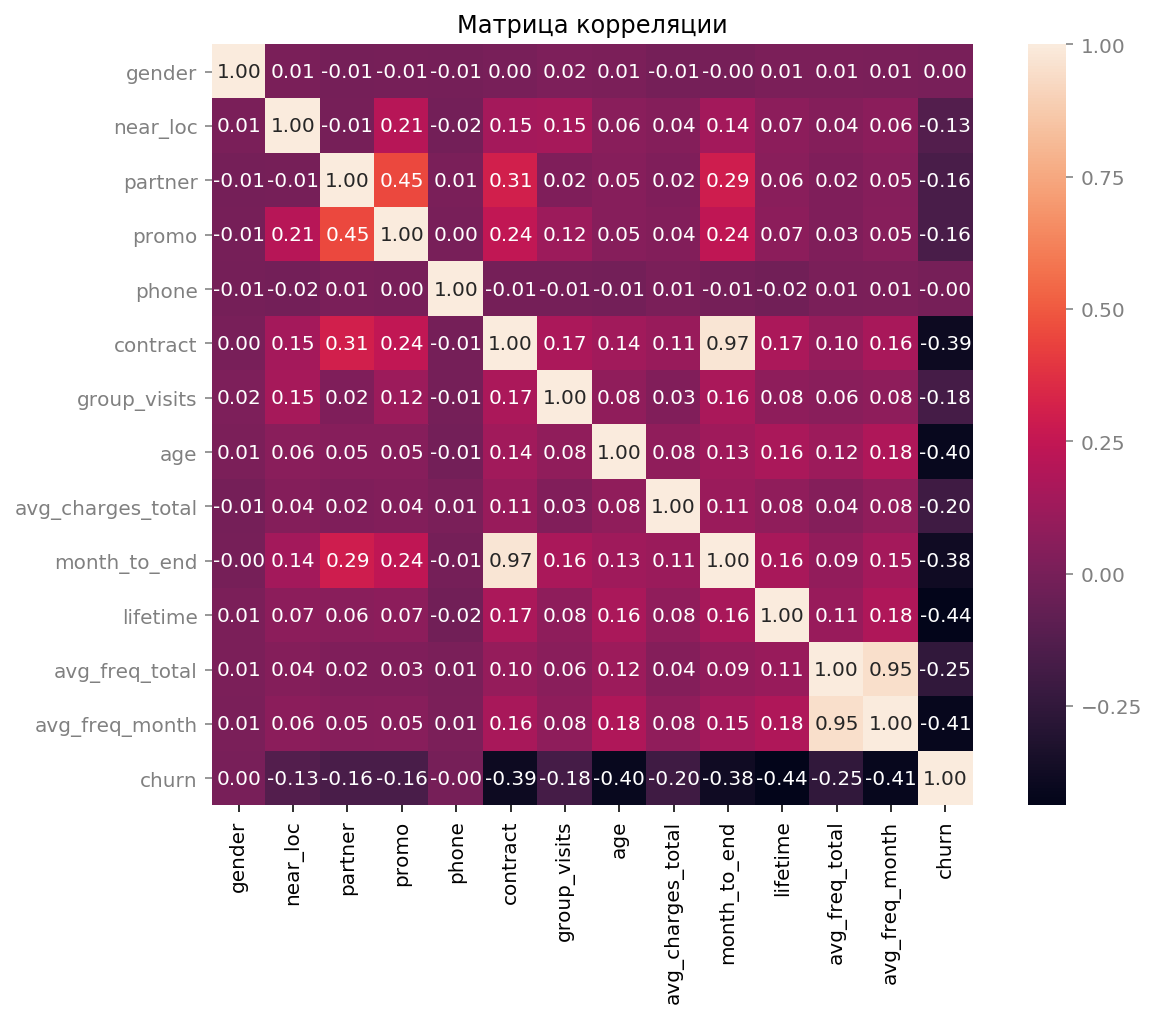

In [10]:
plt.title('Матрица корреляции')
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

Обнаружены два коллинеарных признака:
 - Средня частота посещений в неделю за последний месяц и за все время
 - Длительность текущего действующего абонемента и срок до его окончания

Для улучшения качества модели удалим из этих пар наименее коррелирующие с целевыми показателями признаки.

In [11]:
df.drop(['month_to_end','avg_freq_total'], axis =1, inplace = True)

### Выводы

Наиболее отличающиеся показатели признаков среди группы оттока и текущих клиентов:
- Сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент
- Участие в акции "приведи друга"
- Длительность текущего абонемента
- Посещение групповых занятий
- Дополнительные траты
- Количество месяцев до конца абонемента
- Среднее время с момента первого обращения
- Средняя частота посещений в неделю

Распредление количественных признаков преимущественно нормальное.

В процессе изучения матрицы корреляции признаков были обнаружены коллинераные признаки - для улучшения качества модели они были удалены.

## Модель

Построим модель бинарной классификации клиентов.

Разделим признаки и целевой показатель.

In [12]:
X = df.drop('churn', axis = 1)
y = df['churn']

Разобьем данные на обучающую и валидационную выборку в пропорциях 8 к 2 и стандартизиурем данные.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) 
X_test_st = scaler.transform(X_test)

Протестируем два алгоритма - логическую регрессию и случайный лес, выведем метрики для каждой модели. Будем оценивать показатели доли правильных ответов, точности и полноты.

In [14]:
model_logistic = LogisticRegression(random_state = 0)
model_logistic.fit(X_train_st, y_train)
y_pred = model_logistic.predict(X_test_st) 
print(model_logistic)
print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score (y_test, y_pred),
            recall_score (y_test, y_pred) 
        )
    )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy:0.90 Precision:0.79 Recall:0.82 


In [15]:
model_forest = RandomForestClassifier(random_state = 0)
model_forest.fit(X_train_st, y_train)
y_pred = model_forest.predict(X_test_st) 
print(model_forest)
print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score (y_test, y_pred),
            recall_score (y_test, y_pred) 
        )
    )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy:0.89 Precision:0.80 Recall:0.74 


Модели показали похожие метрики, за исключением показателей полноты (recall) - модель логистической регрессии обнаружила больше реальных объектов "1" класса.  

В условиях данной задачи лучше лишний раз предпринять попытки по удержанию клиента, не собирающегося уходить, чем пропустить отток. Выберем модель логистической регресии как приорететную.

Выведем коэффициенты признаков в порядке убывания важности.

In [16]:
fi_df = pd.DataFrame(
    data={'feature': X.columns.to_list(), 'importance': abs(model_logistic.coef_).tolist()[0] }
)
fi_df.sort_values('importance', ascending=False, inplace = True)
fi_df.reset_index(drop = True, inplace = True)
fi_df.index += 1
fi_df

,feature,importance
1,lifetime,3.805263
2,contract,1.313425
3,avg_freq_month,1.303555
4,age,1.085719
5,avg_charges_total,0.571378
6,group_visits,0.371322
7,promo,0.238327
8,phone,0.085531
9,near_loc,0.082092
10,partner,0.068984


### Выводы

Наиболее подходящим к условиям данной задачи была выбрана модель логистической регрессии.

Модель была обучена и готова прогнозировать величину оттока клиентов.

Наиболее весомые признаки для модели:
- время с момента первого обращения в фитнес-центр
- длительность текущего действующего абонемента
- средняя частота посещений в неделю за предыдущий месяц
- возраст
- суммарная выручка от других услуг фитнес-центра


## Кластеризация

Проведем кластеризацию клиентов.

Стандартизируем данные, построим матрицу расстояний и нарисуем дендрограмму.

In [17]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

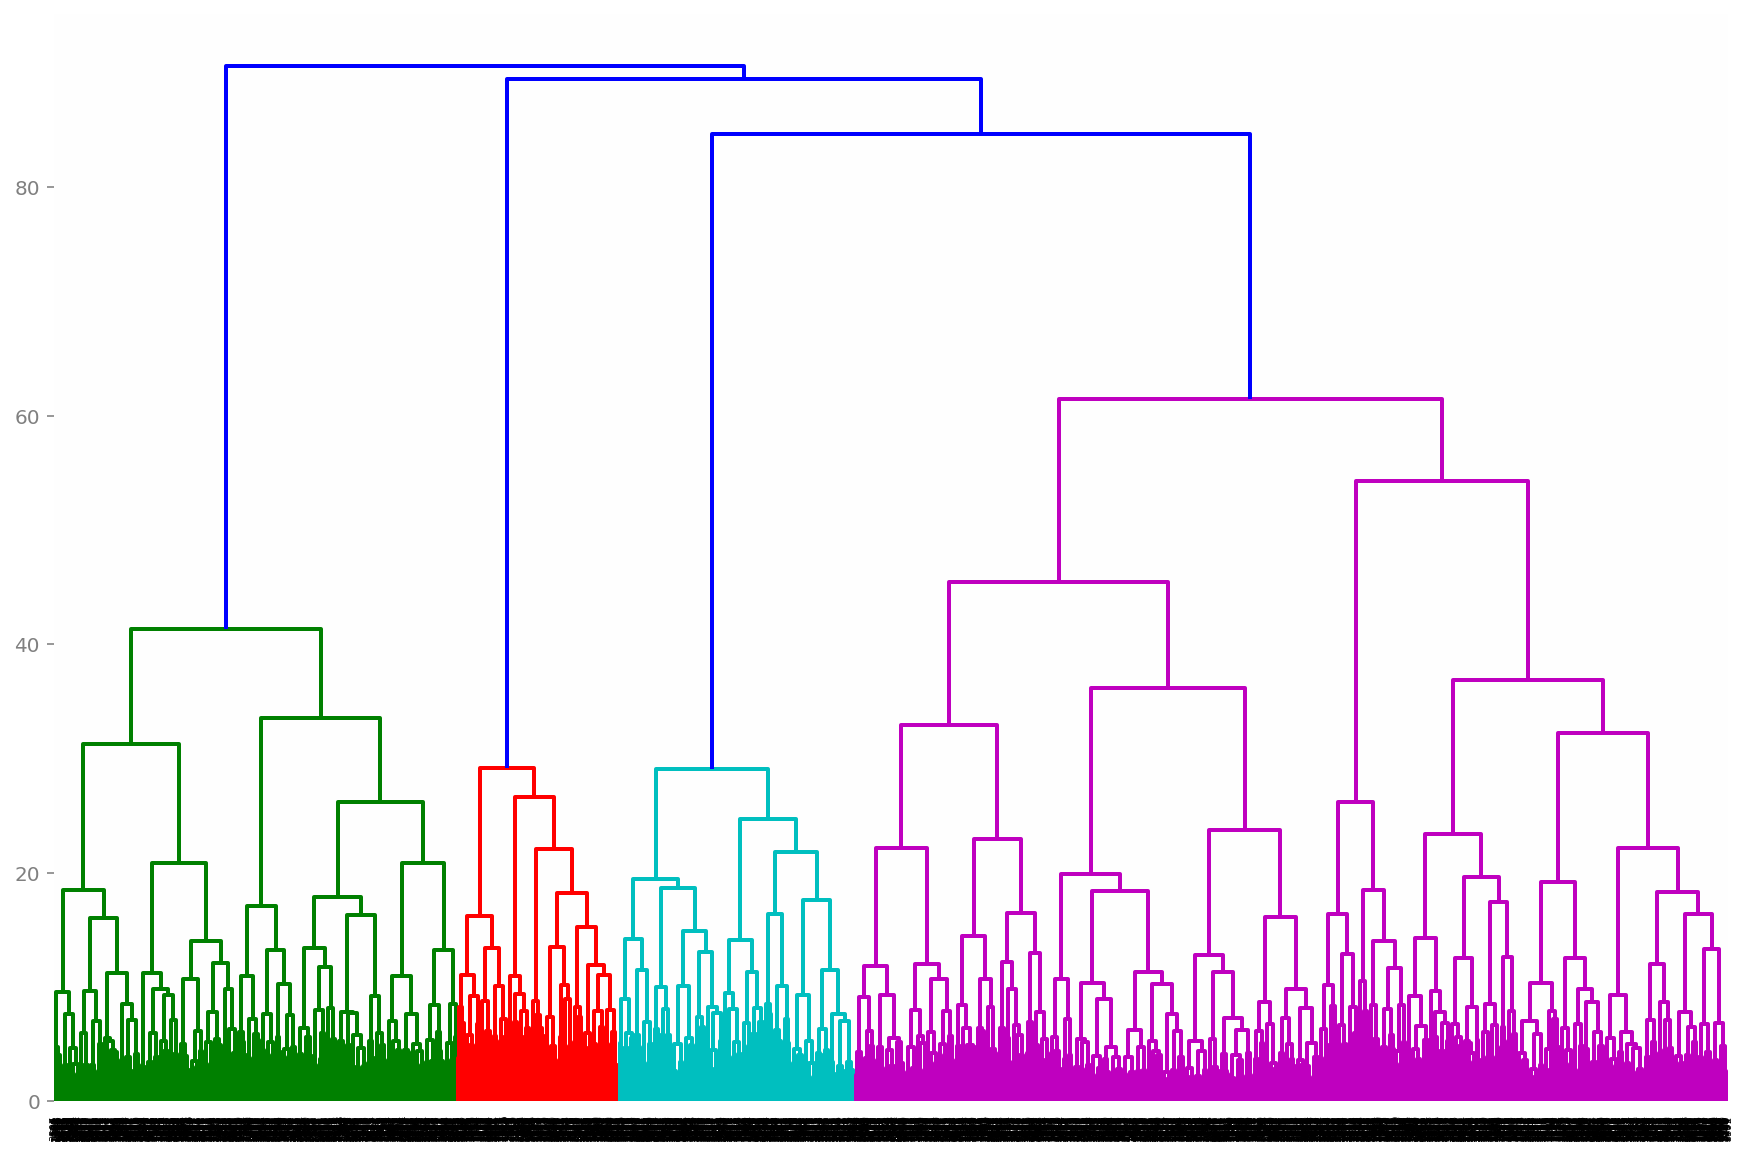

In [18]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Количество групп, определенных алгоритмом - 4. Визульно можно разделить группу отмеченных фиолетовым цветом еще на две.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Число кластров - 5

In [19]:
km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(X_sc)

Добавим результаты кластеризации к исходному датасету.

In [20]:
df['cluster'] = labels + 1

Выведем средние значения признаков для каждого кластера и графики распределения признаков.

In [21]:
df.groupby('cluster').mean().round(3)

,gender,near_loc,partner,promo,phone,contract,group_visits,age,avg_charges_total,lifetime,avg_freq_month,churn
cluster,,,,,,,,,,,,
1,0.496,0.996,0.892,1.000,1.0,6.923,0.525,29.606,153.425,4.283,1.920,0.120
2,0.500,0.000,0.489,0.079,1.0,2.995,0.233,28.679,137.126,2.975,1.597,0.403
3,0.501,1.000,0.217,0.072,1.0,2.010,0.277,27.584,119.340,1.923,1.203,0.564
4,0.534,0.996,0.379,0.010,1.0,6.209,0.538,30.699,176.260,5.415,2.324,0.015
5,0.523,0.863,0.472,0.306,0.0,4.777,0.427,29.298,144.208,3.940,1.724,0.267


Все 5 групп клиентов имеют сильно различающиеся показатели оттока. Более детальный анализ каждого кластера  и их характерных признаков в общих выводах исследования.

In [22]:
binary_features = ['gender','near_loc','partner','promo','phone','group_visits','churn','contract']
nonbinary_features = ['age','avg_charges_total','lifetime','avg_freq_month']

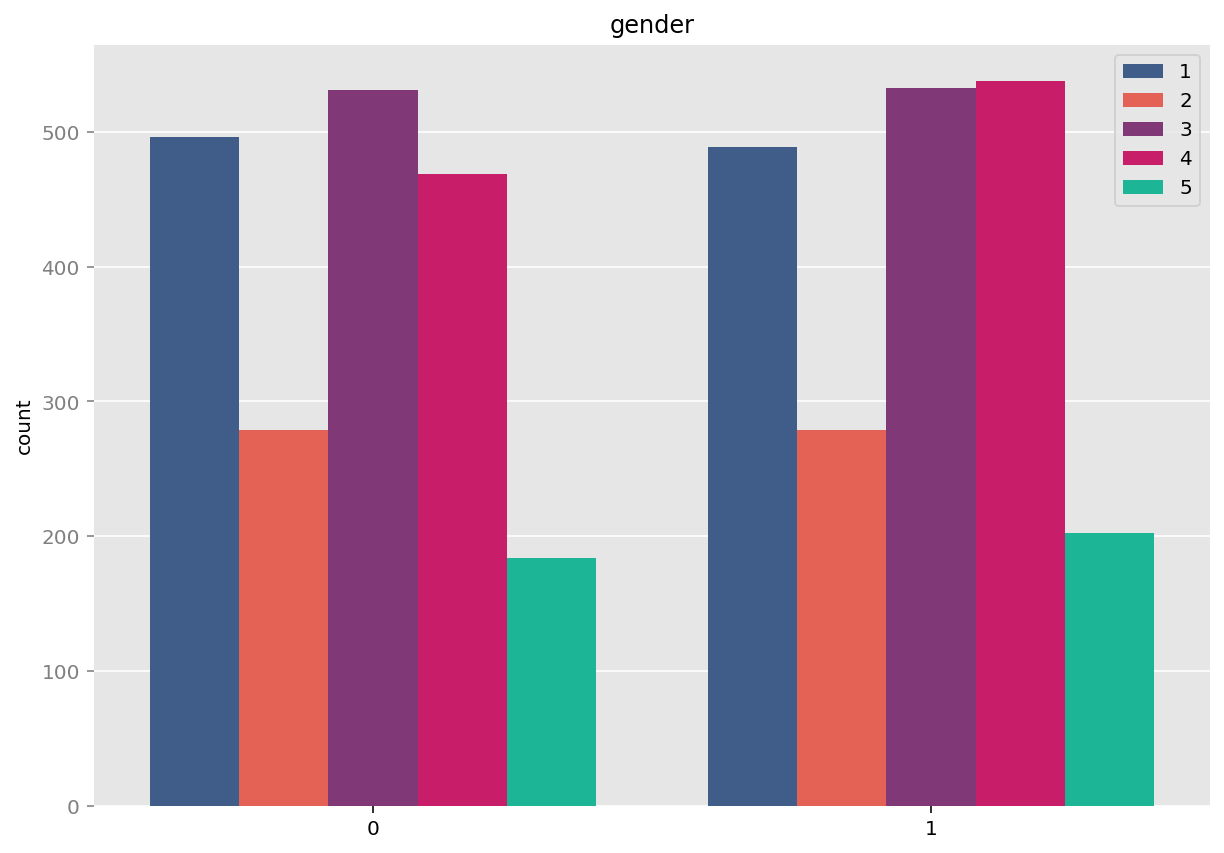

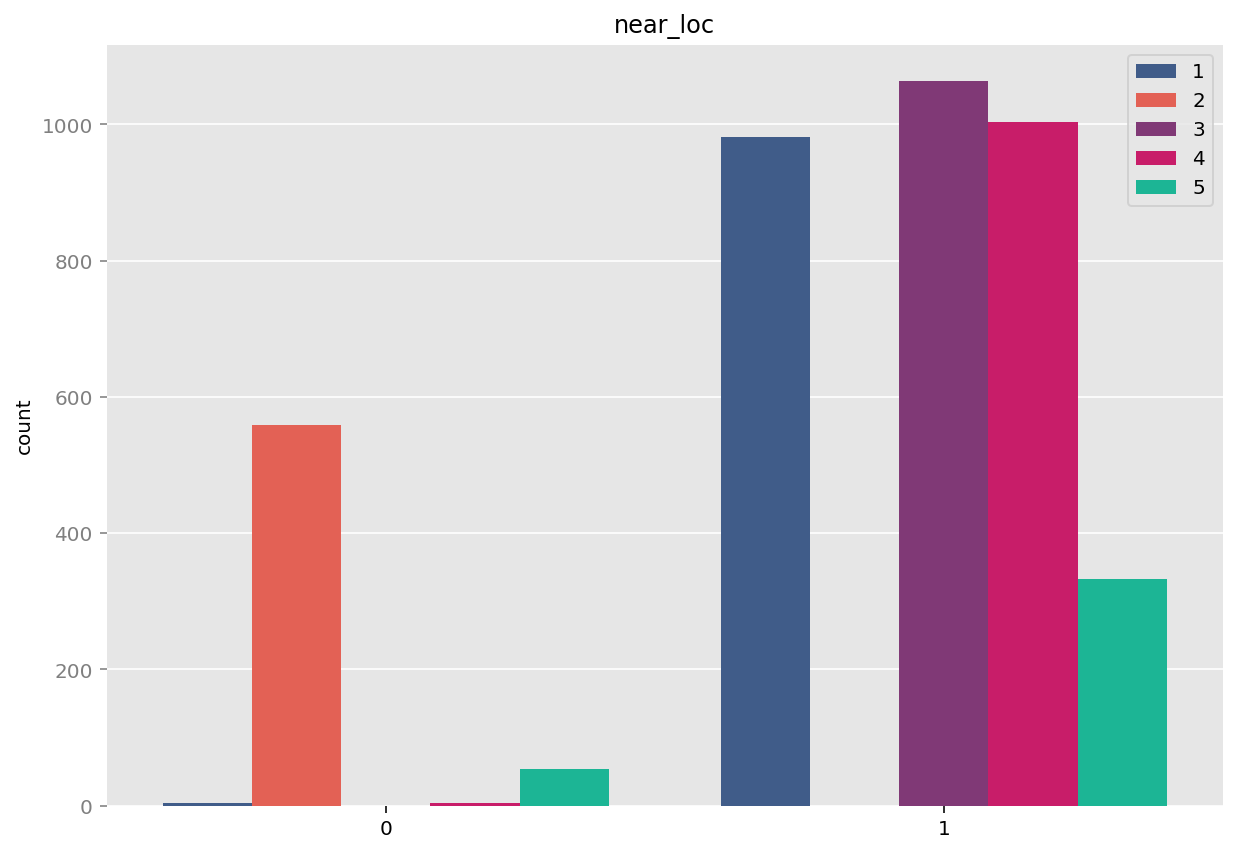

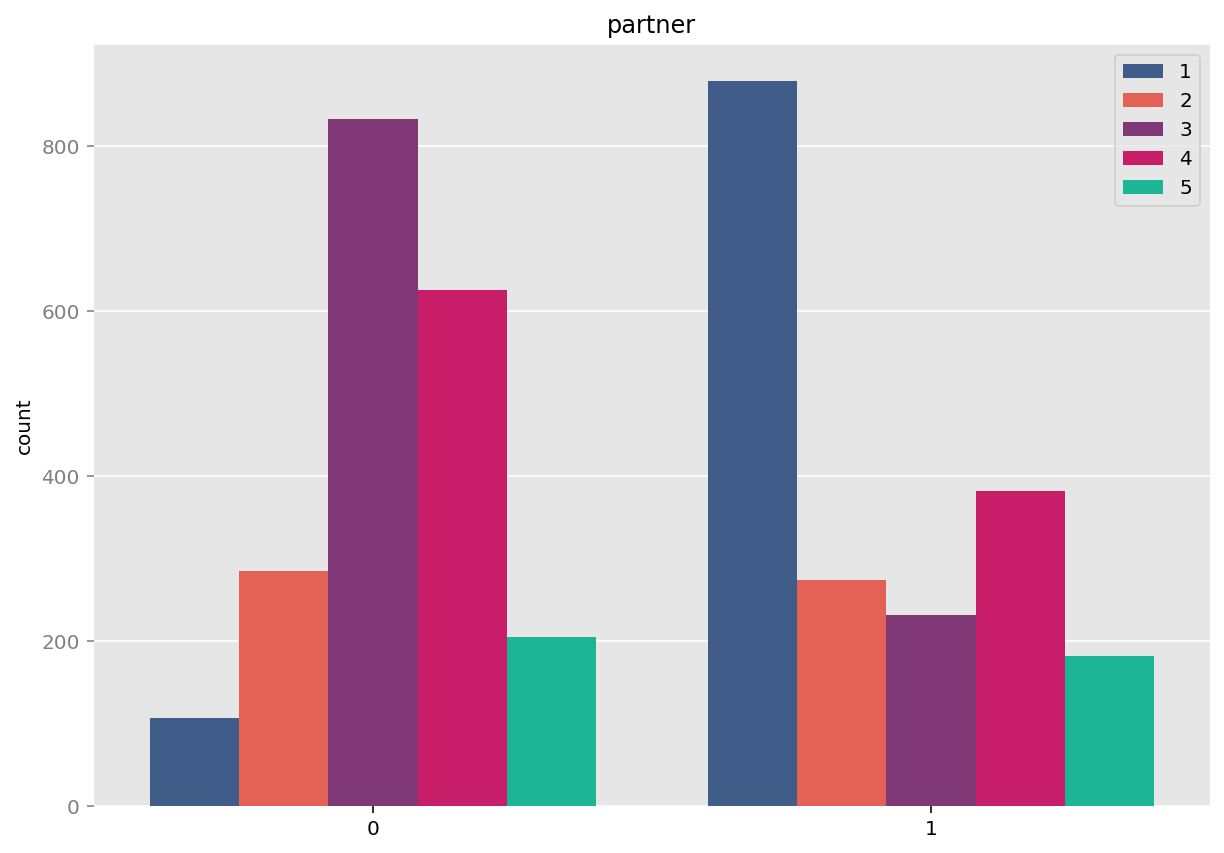

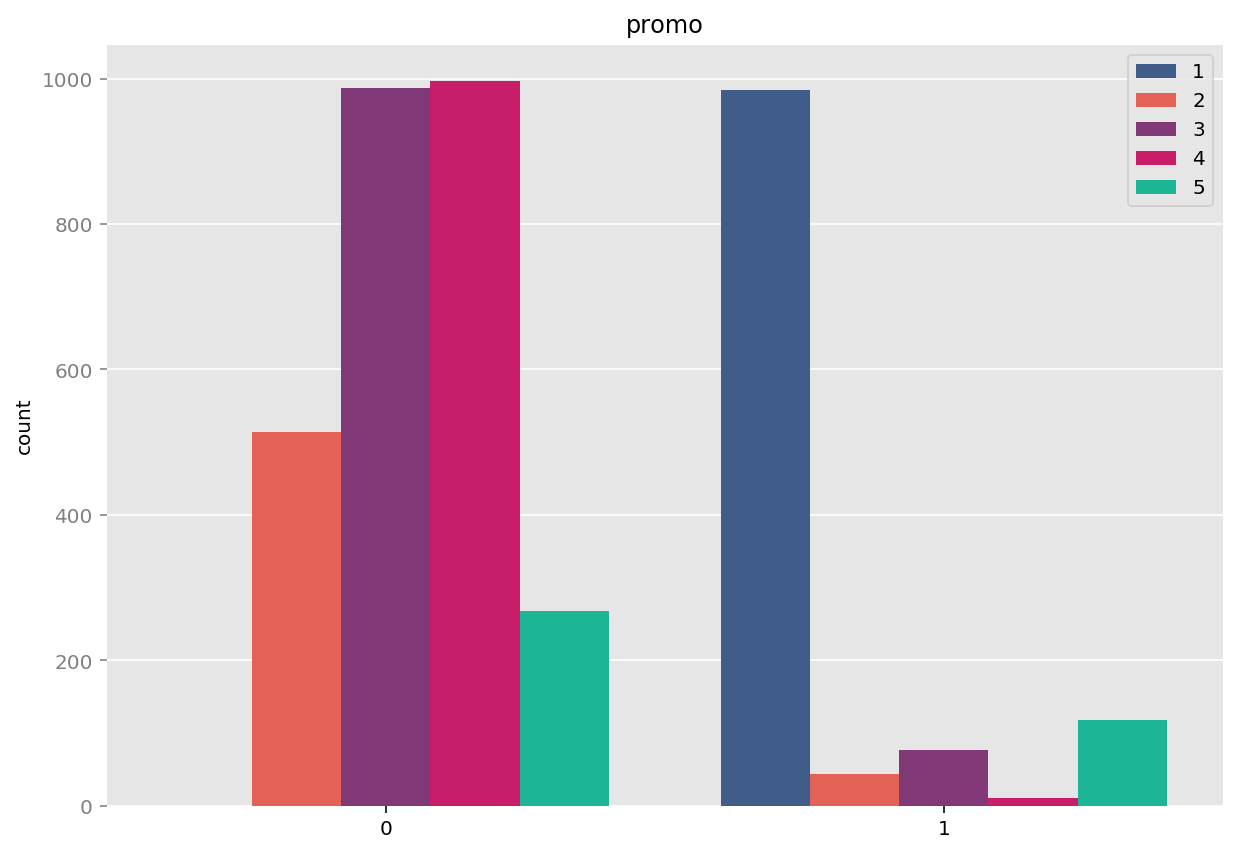

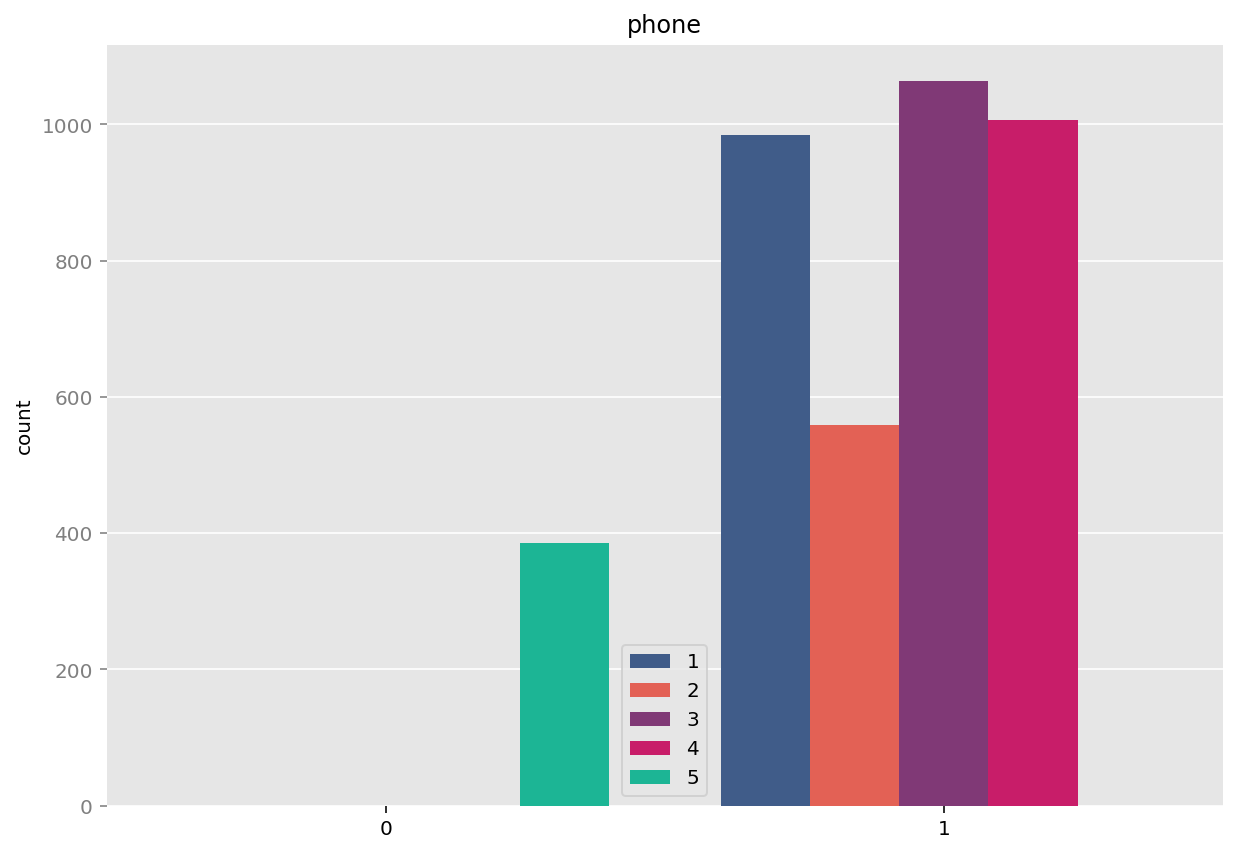

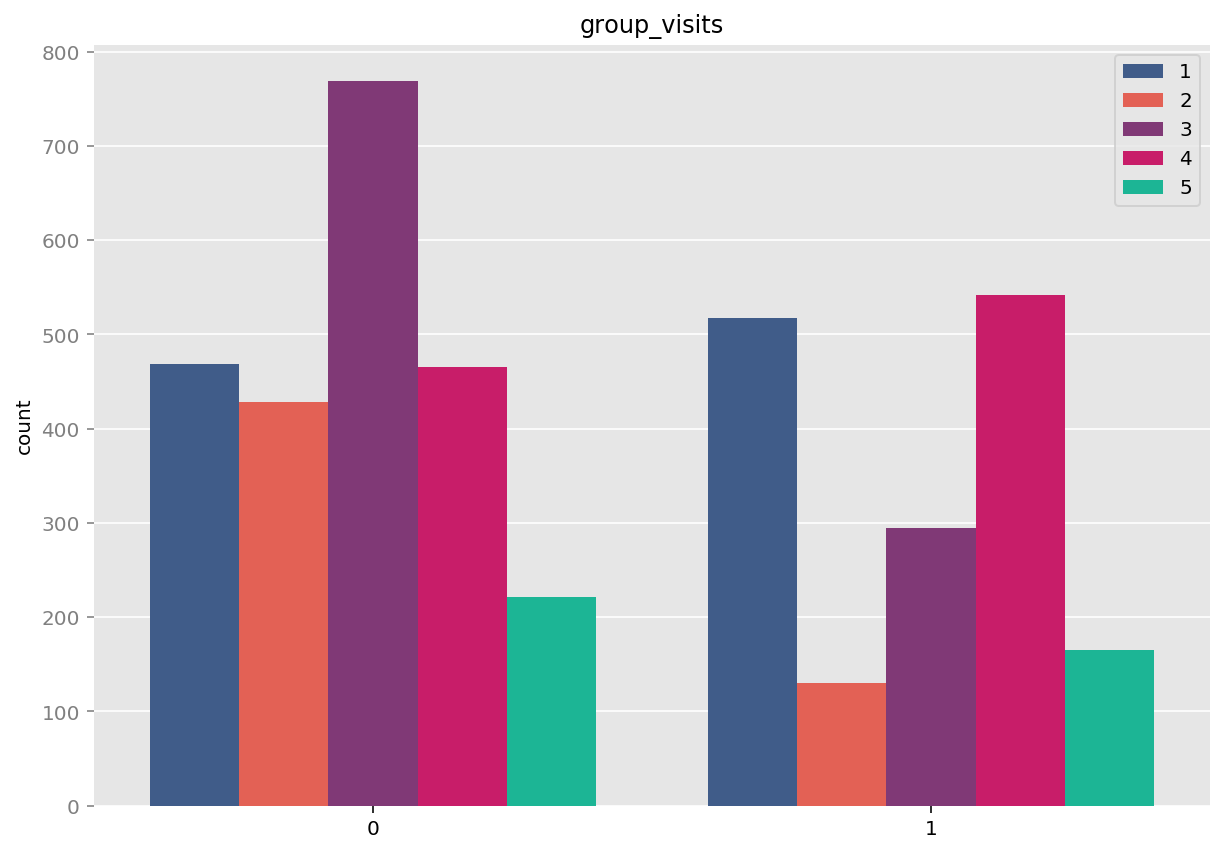

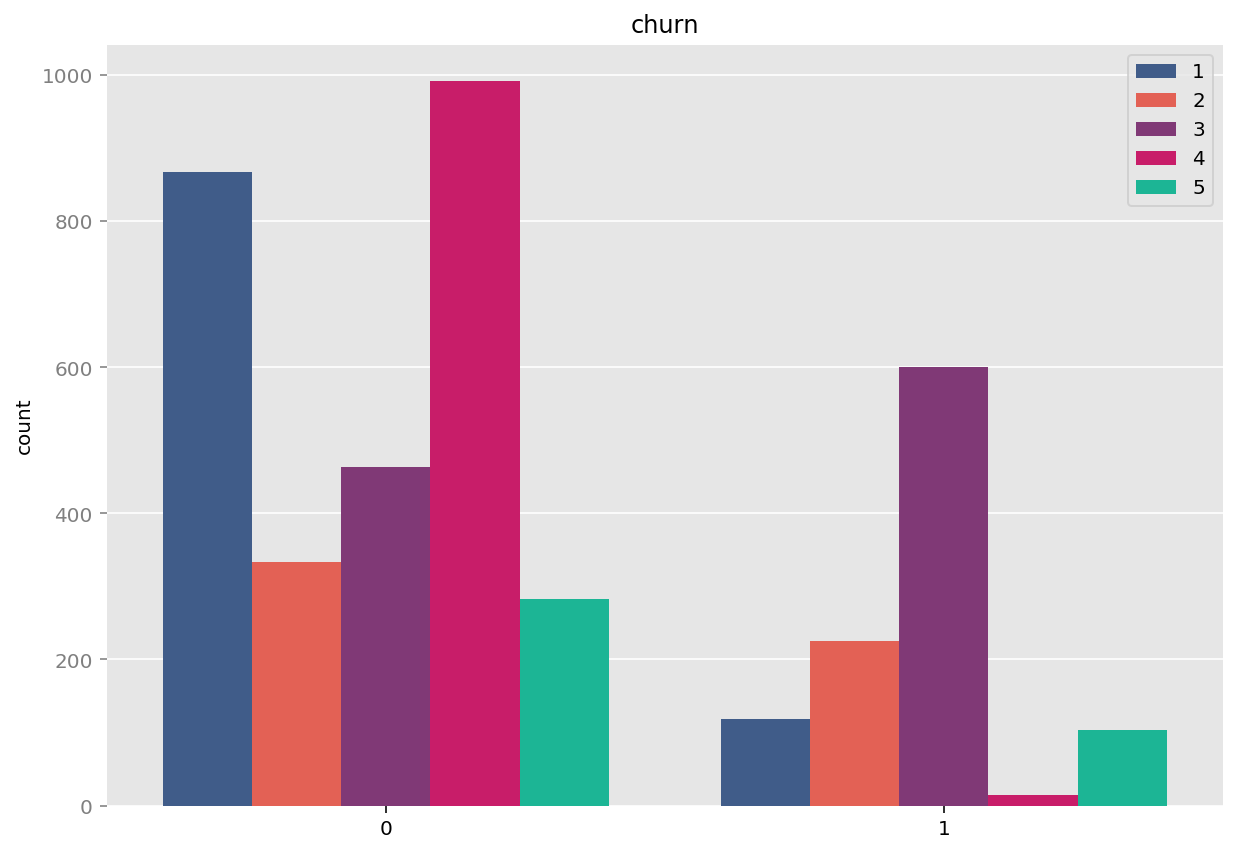

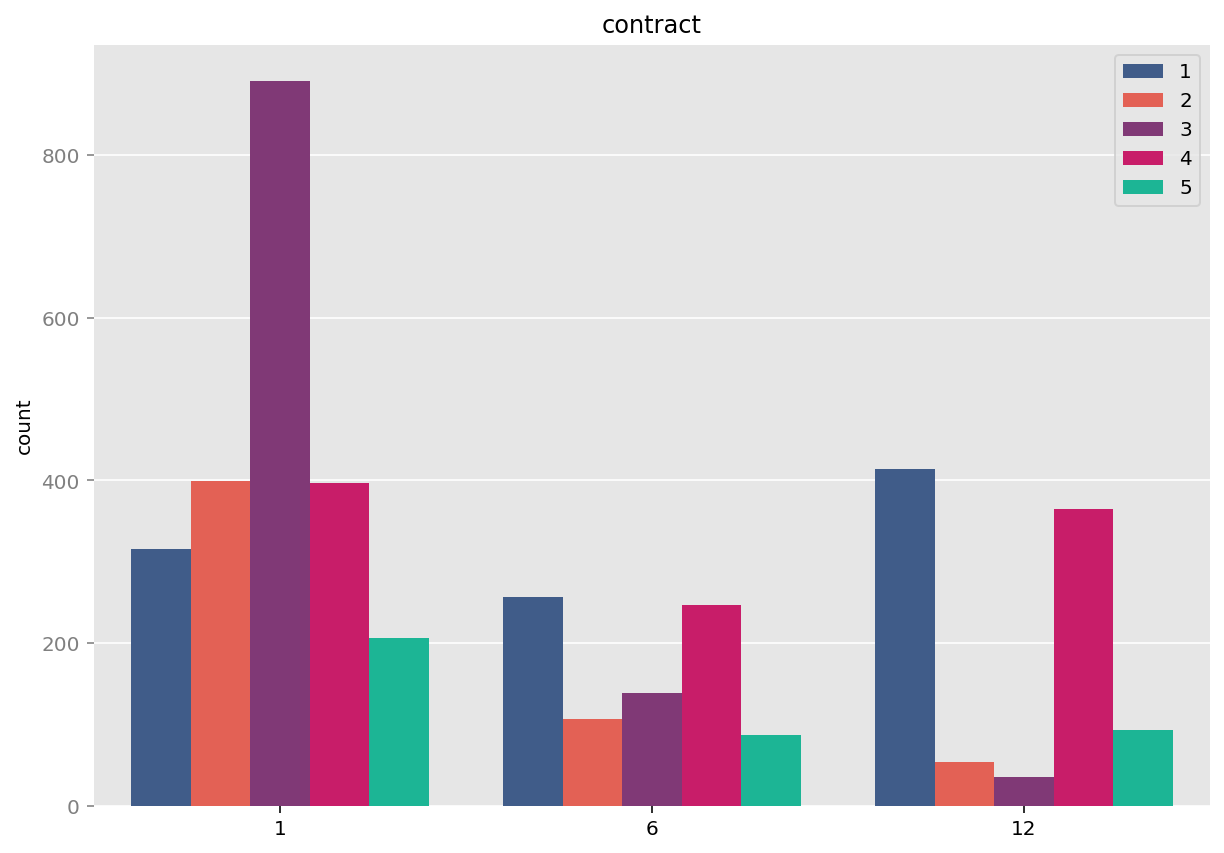

In [23]:
for feature in binary_features:
    fig, ax = plt.subplots(figsize = (10, 7))
    plt.title(feature)
    sns.countplot(x = df[feature], hue = 'cluster' , data = df )
    plt.xlabel('')
    plt.legend()
    plt.show() 

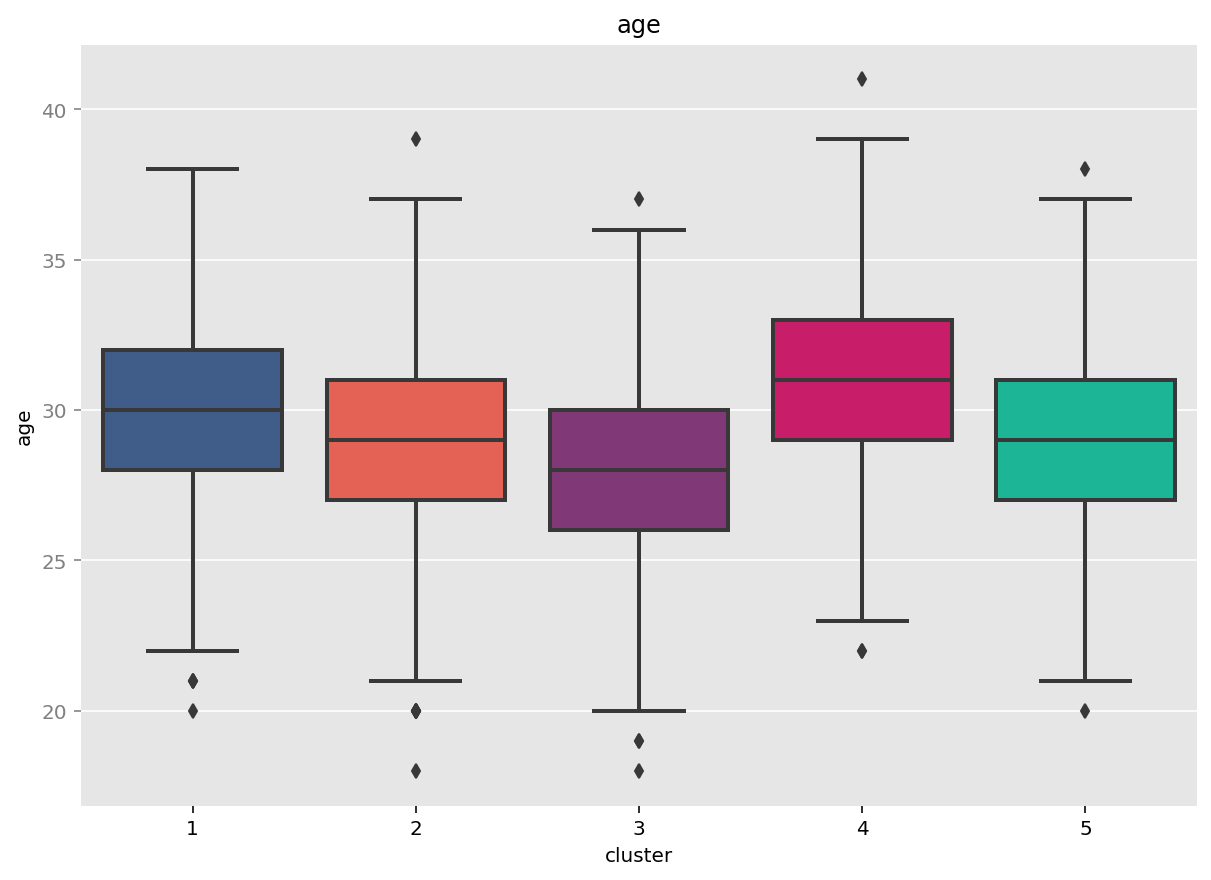

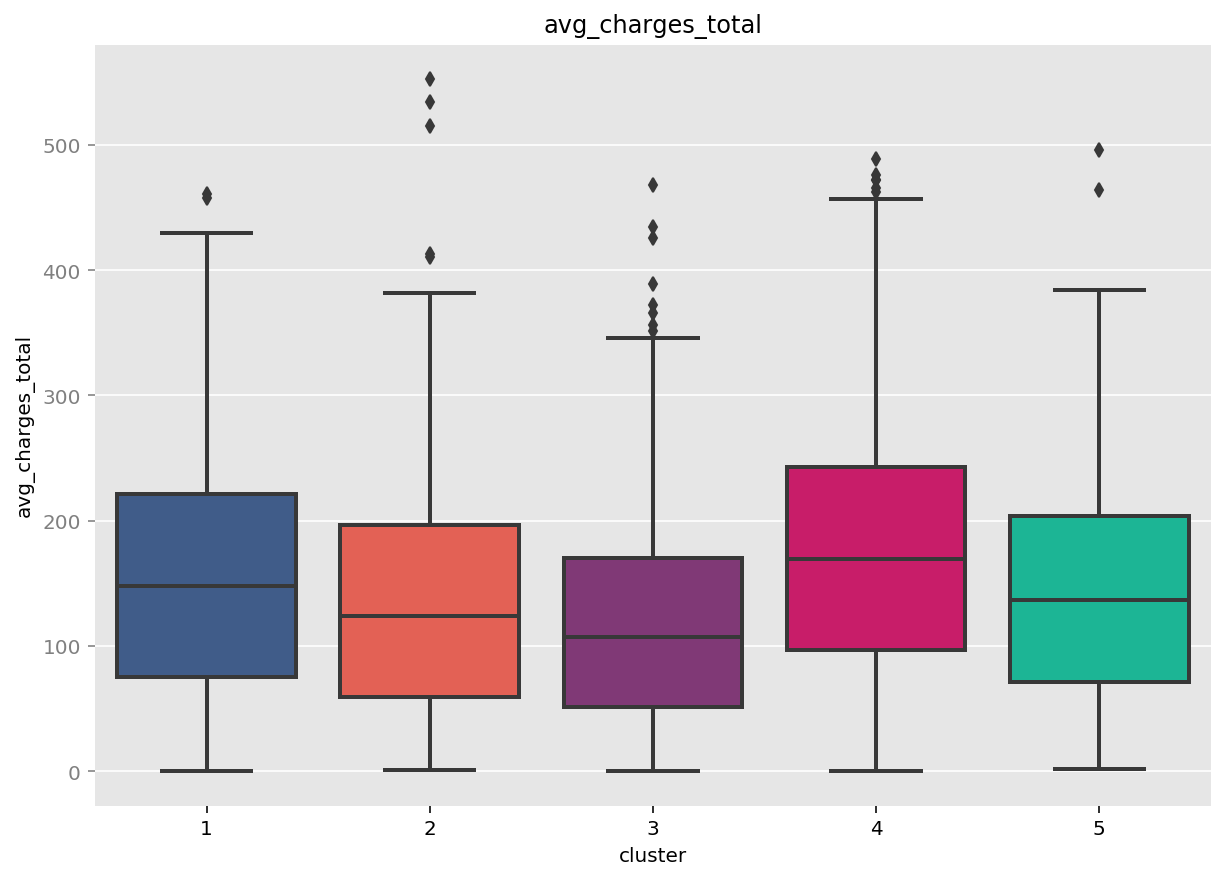

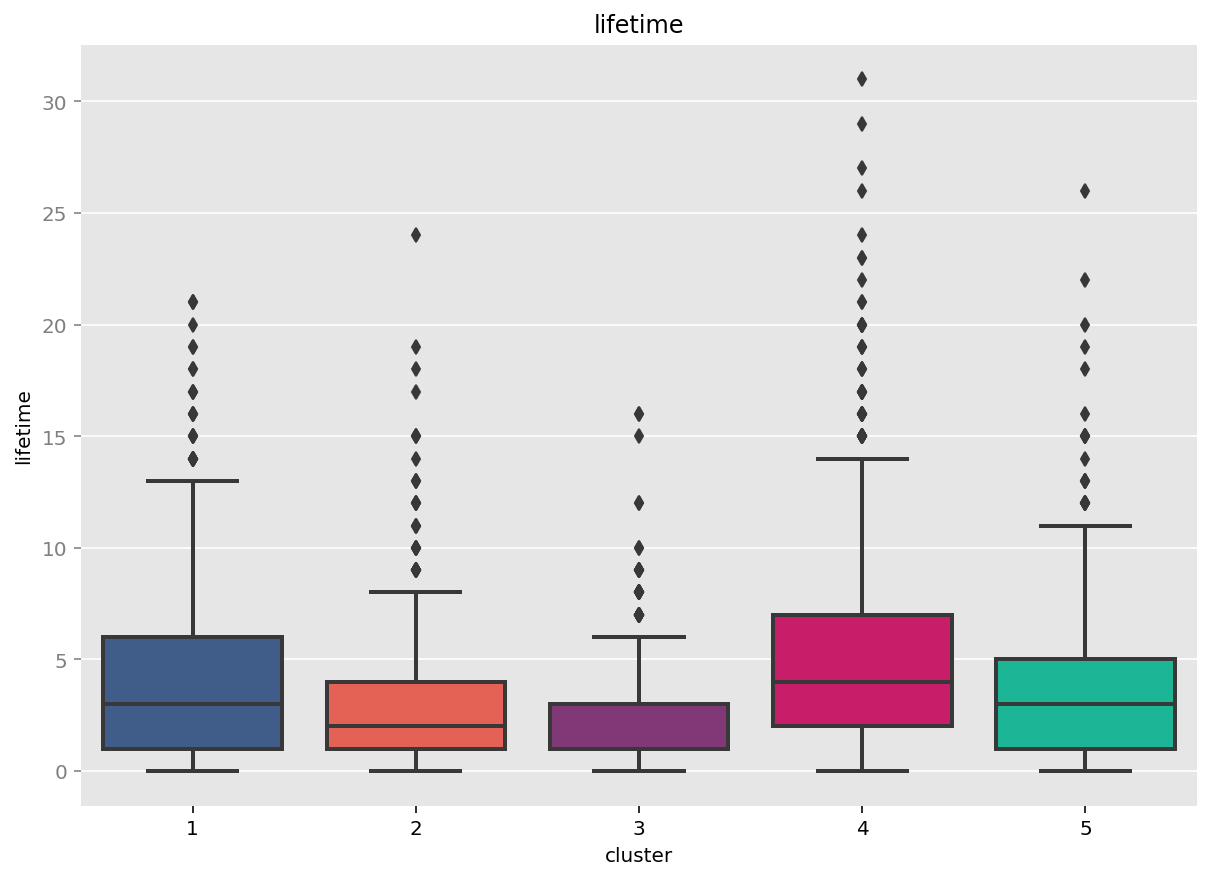

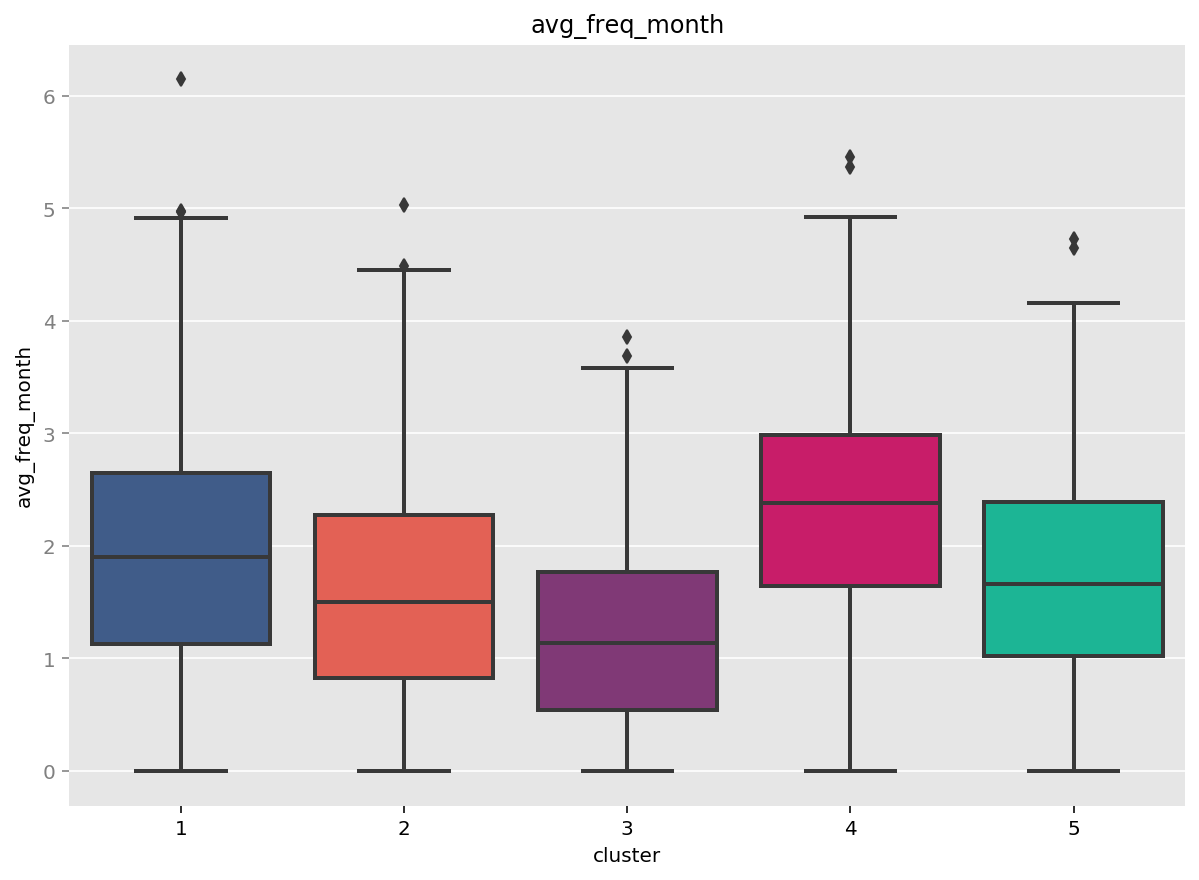

In [24]:
for feature in nonbinary_features:
    fig, ax = plt.subplots(figsize = (10, 7))
    plt.title(feature)
    sns.boxplot(x = 'cluster', y = df[feature] , data = df )
    plt.xlabel('cluster')
    plt.show() 

## Выводы

**Исследовательский анализ данных:**
    
Наиболее отличающиеся показатели признаков среди группы оттока и текущих клиентов:
- Сотрудниками компании-партнёра клуба реже попадают в отток - среди тех кто остался таких 53%, среди ушедших - 35% 
- Пришедшие по программе "приведи друга" реже попадают в отток - среди тех кто остался таких 53%, среди ушедших - 35%
- У текущих клиентов длительность текущего абонемента в среднем составляет 5.7 месяца, в оттоке  1 месяц
- У текущих клиентов показатели посещения групповых занятий выше - 46% против 26%
- У оттока дополнительные траты на треть меньше, чем у оставшихся клиентов.
- Среднее количество месяцев до конца абонемента у оставшихся клиентов 5.3, у оттока 1.6
- Среднее время с момента первого обращения среди тех, кто остался, намного выше - 5 месяцев против 1
- Средняя частота посещений в неделю среди тех, кто остался, больше примерно в 2 раза.

**Построение модели:**
    
Наиболее подходящим к условиям данной задачи была выбрана модель логистической регрессии.
Модель была обучена и готова прогнозировать величину оттока клиентов.

Наиболее весомые признаки для модели:
- время с момента первого обращения в фитнес-центр
- длительность текущего действующего абонемента
- средняя частота посещений в неделю за предыдущий месяц
- возраст
- суммарная выручка от других услуг фитнес-центра

**Кластеризация:**

С помощью алгоритма кластеризаци было выделено 5 групп клиентов:

1 группа: "Корпораты"
- Имеет относительно малые показатели оттока - 12 %
- 90 % клиентов - сотрудники компании-партнёра клуба.
- Все клиенты - участники акции приведи друга
- Довольно частая частота посещения - в среднем 2 раза в неделю
- Большая средняя длительность текущего абонемента - 7 месяцев

2 группа: "Далекие"
- Большие показатели оттока - 40%
- Отличитаельная особенность группы - никто из клиентов не проживает или работает в районе, где находится фитнес-центр.
- самый малый процент посещения групповых занятий среди всех групп

3 группа: "Немотивированные"
- Самый большой показатель оттока - 56%
- Самая малая средняя длительность текущего абонемента -  2 месяца
- Самый малый возраст
- Самая малая частота посещения
- Меньше всего участников акции "приведи друга"
- Самое малое среднее время с момента первого обращения в фитнес-центр

4 группа: "Зрелые Спортсмены"
- Самые малые показатели оттока - 1%
- Самое больше среднее время с момента первого обращения в фитнес-центр - в среднем 5.4 месяца
- Самая большая доля посещающих групповые занятия.
- Большая средняя длительность текущего абонемента - 6 месяцев
- Самый большой средний возраст
- Самые большие допольнительные траты

5 группа: "Немобильные"
- Средние показатели оттока - 26%
- Единственная отличительная черта - отсутвие контактного телефона

У группы "Немобильных" такие же показатели оттока, как и в общем по датасету - скорее всего наличие контактного телефона никак не связано с остальными признаками и целевым показателем.

**Рекомендации по работе с отдельными группами клиентов:**

2 группа: "Далекие":
- Клиентам, не проживающим в районе, где находится фитнес-центр, можно предложить дополнительные акции, например "подвези друга". Так же можно предложить онлайн тренировки с тренерами клуба, в те дни, когда ехать в фитнес-центр особенно лень. 

3 группа: "Немотивированные"
- Эта группа клиентов скорее всего имеет проблемы с мотивацией к спортивным достижениям. Возможные способы воздействия:
  - Подбор наиболее вдохновляющих тренеров, способных выстраивать дружелюбные отношения с клиентом.
  - Дополнительные акции, а так же более интересные условия уже существующией акции "приведи друга" - наличие товарища, готового подстраховать, так же улучшает показатели оттока.

5 группа: "Немобильные"
- Следует дополнительно замотивировать клиентов оставить свой контактный телефон - например бесплатным кофе или протеиновым коктейлем. Показатели оттока это не улучшит, зато поможет классифицировать клиентов в более прогнозируемые группы. 

1 группа "Корпораты" и 4 группа "Зрелые Спортсмены" имеют неплохие показатели оттока, условия для них можно сохранить на прежнем уровне.

**Общие рекомендации для улучшения показателей оттока, применимые ко всем клиентам:**
 - Увеличение количества компаний-партнёров клуба
 - Увеличение масштабов акции "приведи друга"
 - Увеличение показателей средней длительности текущего действующего абонемента - более интересные условия для полугодового и годового абонемента.
 - Расширенное информирование о групповых занятиях клиентов клуба.
 - СМС-сообщения и email-рассылки с напоминаниями о тренировках, а так же со статьями о преимуществах здорового образа жизни.


   